In [1]:
from __future__ import print_function, division
import mdtraj as md
from mdtraj.utils import ensure_type
from mdtraj.geometry import compute_distances, compute_angles
from mdtraj.geometry import _geometry
import os
import sys
import numpy as np
import scipy as sp
from scipy import optimize
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import math
import itertools    
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, array, cumsum, dot, transpose, diagonal, floor
from numpy.linalg import inv, lstsq
import pyblock
from mdtraj.geometry import _geometry
from mdtraj.utils import ensure_type
from mdtraj.geometry import compute_distances, compute_angles
from scipy.stats import pearsonr
import json

class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

In [2]:
def subplot_snsheat(data, ax=None, cbar=False, cbar_ax=None):
    from numpy import ndarray
    import seaborn as sns
    if type(data) is ndarray:

        if ax is None:
            ax = plt.gca()

        plot = sns.heatmap(data, cmap='jet', vmin=0,vmax=0.5,ax=ax, cbar=cbar, cbar_ax=None if not cbar else cbar_ax)
        return plot

    else: pass
    
def subplot_imshow(data, xedges, yedges, ax=None):
    
    from numpy import ndarray
    
    if type(data) is ndarray:

        if ax is None:
            ax = plt.gca()
            
        im = ax.imshow(data, interpolation='gaussian', extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],
                        cmap='jet', aspect='auto')
        #cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),aspect=10)
        
        return im
    
    else : pass

In [3]:
data_dir_a='/home/jaya/work/master_books/data/anton/fas/'

In [4]:
hbond_a={}
charge_a={}
aro_a={}
hphob_a={}

contact_a=np.loadtxt(data_dir_a+'contact_prob.dat')

hbond_a['all']=np.loadtxt(data_dir_a+'hbond_fraction.be.dat')
charge_a['all']=np.loadtxt(data_dir_a+'charge_contacts.dat')
aro_a['all']=np.loadtxt(data_dir_a+'aromatic_stacking.fraction.r0.be.dat')
hphob_a['all']=np.loadtxt(data_dir_a+'hphob_contacts.be.dat')

kd_errors_a=np.loadtxt(data_dir_a+'KD.timecourse.errors.dat')

hbond_a['bf']=np.loadtxt(data_dir_a+'hbond_fraction.boundfraction.be.dat')
charge_a['bf']=np.loadtxt(data_dir_a+'charge_contacts.BF.dat')
aro_a['bf']=np.loadtxt(data_dir_a+'aromatic_stacking.boundfraction.r0.be.dat')
hphob_a['bf']=np.loadtxt(data_dir_a+'hphob_contacts.BF.dat')

In [5]:
replica0,nrep=0,8

sequence=  ['ASP121', '', 'GLU123', '', 'TYR125', '', 'MET127', '', 'SER129', '', 'GLU131', '',\
            'TYR133', '', 'ASP135', '', 'GLU137', '', 'GLU139', 'ALA140']


temperature = [ '300','317.89','336.847','356.935','378.22','400.775','424.675','450' ]


In [6]:
data_dir='/home/jaya/work/REST3/async_lig47/data/'

In [7]:
contact_map_p=json.load(open(data_dir+'p_contact_map.json','r'))

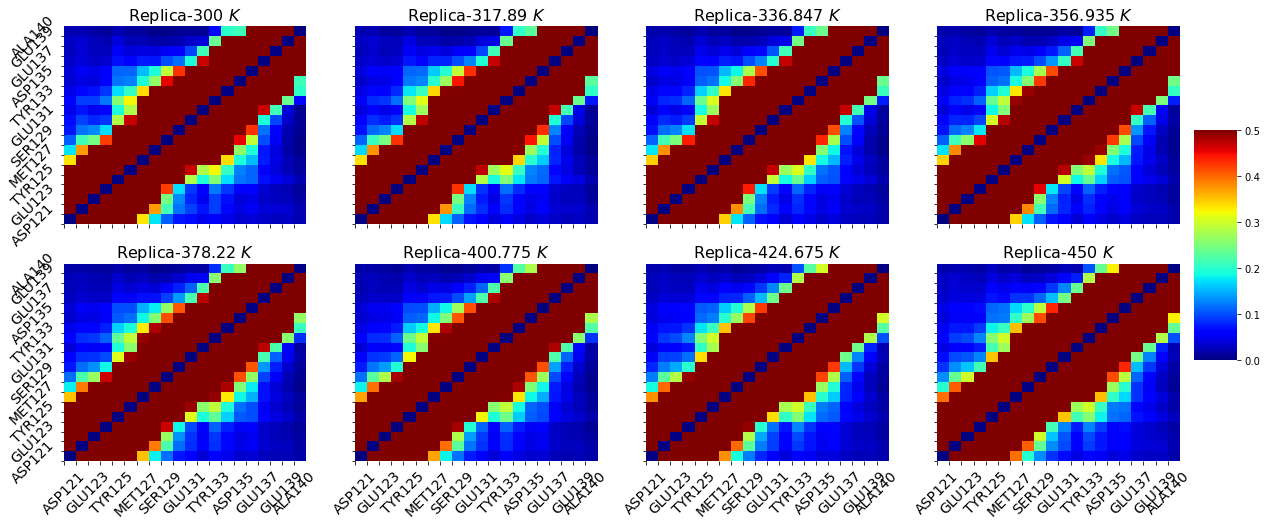

In [8]:
ncol = 4
nrow = int(nrep/ncol)
fig, ax = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=(20, 8))
cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i in range(replica0,replica0+nrep):
    #contact_map = np.loadtxt(f"./Analysis/contact_map.{i}.dat")
    contact_map = np.array(contact_map_p['rep'])[i]
    p, q = np.unravel_index(i,(nrow,ncol))
    cb = i==1
    subplot_snsheat(contact_map, ax=ax[p,q], cbar=cb, cbar_ax=cbar_ax)
    ax[p,q].set_xticks(range(0, 20), sequence, rotation=45, size=14)
    ax[p,q].set_yticks(range(0, 20), sequence, rotation=45, size=14)
    ax[p,q].invert_yaxis()
    ax[p,q].set_title('Replica-'+str(temperature[i])+r' $K$',size=16)
    
plt.savefig(data_dir+'p_contact_maps_rep.png',dpi=310)

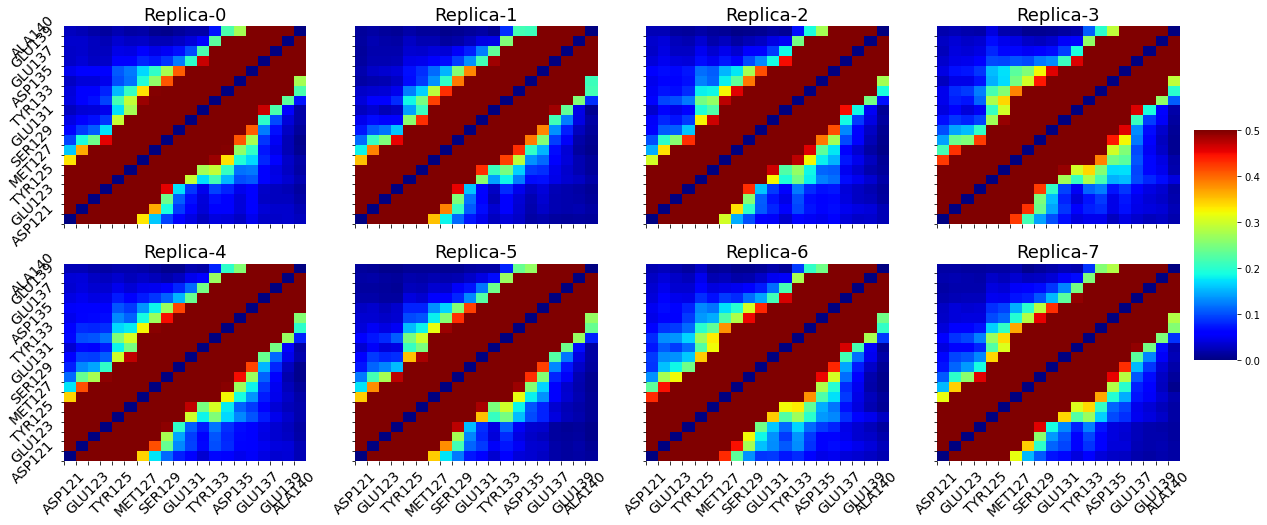

In [9]:
ncol = 4
nrow = int(nrep/ncol)
fig, ax = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=(20, 8))
cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i in range(replica0,replica0+nrep):
    #contact_map = np.loadtxt(f"./Analysis/contact_map.{i}.dat")
    contact_map = np.array(contact_map_p['demux'])[i]
    p, q = np.unravel_index(i,(nrow,ncol))
    cb = i==1
    subplot_snsheat(contact_map, ax=ax[p,q], cbar=cb, cbar_ax=cbar_ax)
    ax[p,q].set_xticks(range(0, 20), sequence, rotation=45, size=14)
    ax[p,q].set_yticks(range(0, 20), sequence, rotation=45, size=14)
    ax[p,q].invert_yaxis()
    ax[p,q].set_title('Replica-'+str(i),size=18)
    
plt.savefig(data_dir+'p_contact_maps_demux.png',dpi=310)

In [10]:
contact_map_l=json.load(open(data_dir+'l_contact_map.json','r'))

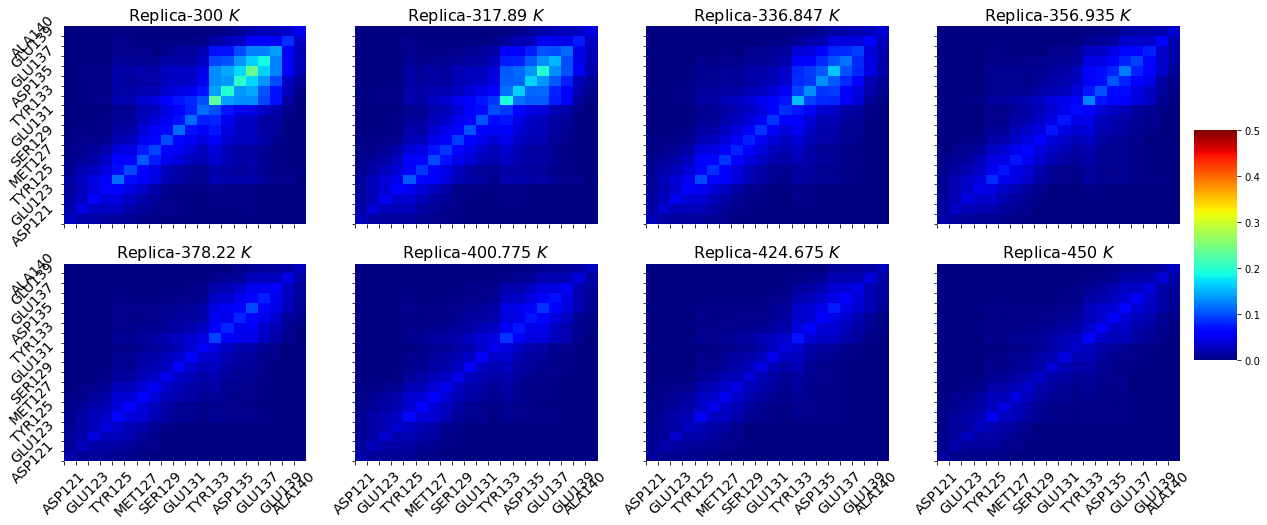

In [11]:
ncol = 4
nrow = int(nrep/ncol)
fig, ax = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=(20, 8))
cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i in range(replica0,replica0+nrep):
    #contact_map = np.loadtxt(f"./Analysis/contact_map.{i}.dat")
    contact_map = np.array(contact_map_l['rep'])[i]
    p, q = np.unravel_index(i,(nrow,ncol))
    cb = i==1
    subplot_snsheat(contact_map, ax=ax[p,q], cbar=cb, cbar_ax=cbar_ax)
    ax[p,q].set_xticks(range(0, 20), sequence, rotation=45, size=14)
    ax[p,q].set_yticks(range(0, 20), sequence, rotation=45, size=14)
    ax[p,q].invert_yaxis()
    ax[p,q].set_title('Replica-'+str(temperature[i])+r' $K$',size=16)
    
plt.savefig(data_dir+'l_contact_maps_rep.png',dpi=310)

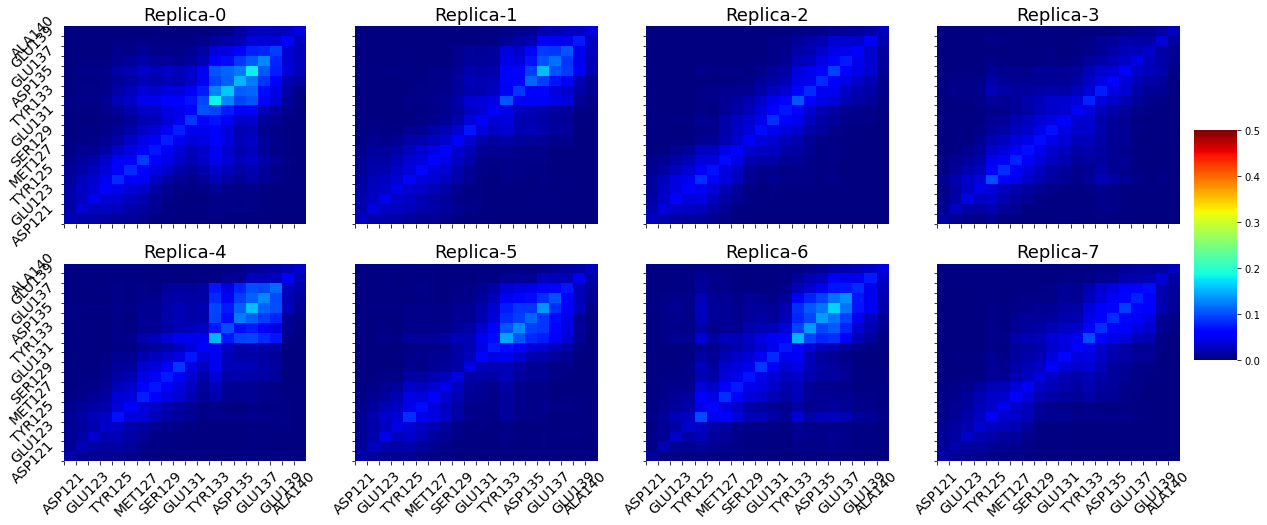

In [12]:
ncol = 4
nrow = int(nrep/ncol)
fig, ax = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=(20, 8))
cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i in range(replica0,replica0+nrep):
    #contact_map = np.loadtxt(f"./Analysis/contact_map.{i}.dat")
    contact_map = np.array(contact_map_l['demux'])[i]
    p, q = np.unravel_index(i,(nrow,ncol))
    cb = i==1
    subplot_snsheat(contact_map, ax=ax[p,q], cbar=cb, cbar_ax=cbar_ax)
    ax[p,q].set_xticks(range(0, 20), sequence, rotation=45, size=14)
    ax[p,q].set_yticks(range(0, 20), sequence, rotation=45, size=14)
    ax[p,q].invert_yaxis()
    ax[p,q].set_title('Replica-'+str(i),size=18)
    
plt.savefig(data_dir+'l_contact_maps_demux.png',dpi=310)

In [13]:
bf_kd=json.load(open(data_dir+'bf_kd.json','r'))

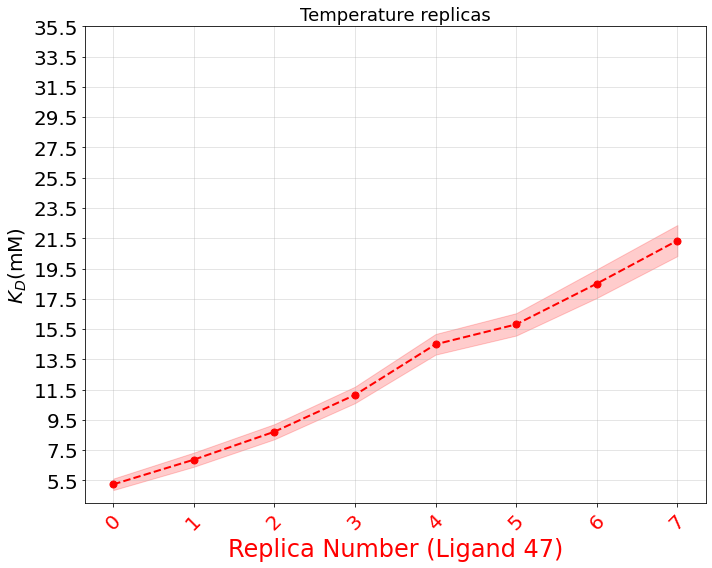

In [18]:
fig=plt.figure(figsize=(10,8))

#default_x_ticks=range(nrep)
plt.xticks(range(0,nrep),fontsize=20, rotation=45, font='Verdana',color='r')
#ax1.set_xticklabels(kd41[:,0])
plt.xlabel('Replica Number (Ligand 47)', fontsize=24,color='r')
plt.plot(range(nrep),np.array(bf_kd['rep'])[2],linestyle='--', marker='o', color='r', lw=2, ms=7)
plt.fill_between(range(nrep), np.array(bf_kd['rep'])[2]-np.array(bf_kd['rep'])[3],
                 np.array(bf_kd['rep'])[2]+np.array(bf_kd['rep'])[3], color='r', alpha=0.2)

plt.yticks(np.arange(5.5,35.6,2),size=20)
plt.grid(alpha=0.4)
yl=r'$K_{D}$(mM)'
plt.ylabel(yl,size=20)
plt.title("Temperature replicas",size=18)
plt.tight_layout()

plt.savefig(data_dir+'kd_rep.png',dpi=210)

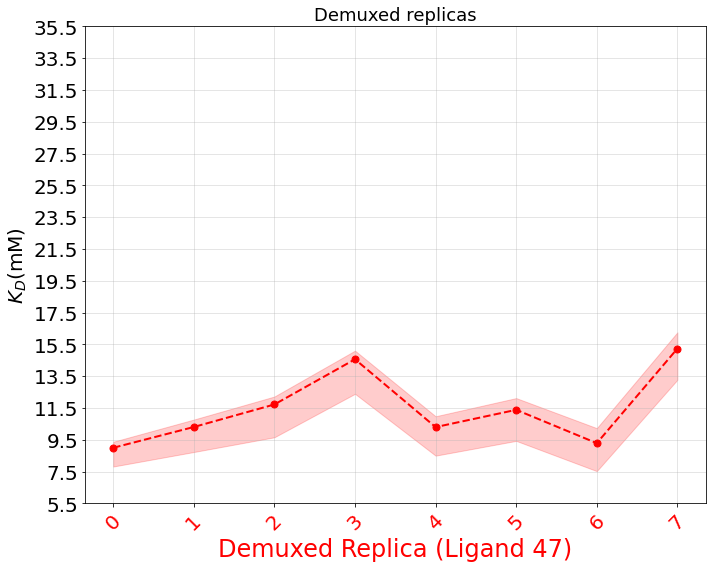

In [19]:
fig=plt.figure(figsize=(10,8))

#default_x_ticks=range(nrep)
plt.xticks(range(0,nrep),fontsize=20, rotation=45, font='Verdana',color='r')
#ax1.set_xticklabels(kd41[:,0])
plt.xlabel('Demuxed Replica (Ligand 47)', fontsize=24,color='r')
plt.plot(range(nrep),np.array(bf_kd['demux'])[2],linestyle='--', marker='o', color='r', lw=2, ms=7)
plt.fill_between(range(nrep), np.array(bf_kd['demux'])[2]-np.array(bf_kd['demux'])[3],
                 np.array(bf_kd['demux'])[2]+np.array(bf_kd['rep'])[3], color='r', alpha=0.2)

plt.yticks(np.arange(5.5,35.6,2),size=20)
plt.grid(alpha=0.4)
yl=r'$K_{D}$(mM)'
plt.ylabel(yl,size=20)
plt.title("Demuxed replicas",size=18)

plt.tight_layout()

plt.savefig(data_dir+'kd_demux.png',dpi=210)

In [20]:
ss=json.load(open(data_dir+'ss_fraction.json','r'))
sa=json.load(open(data_dir+'sa_timeseries.json','r'))
pp=json.load(open(data_dir+'pp_timeseries.json','r'))
rg=json.load(open(data_dir+'rg_timeseries.json','r'))

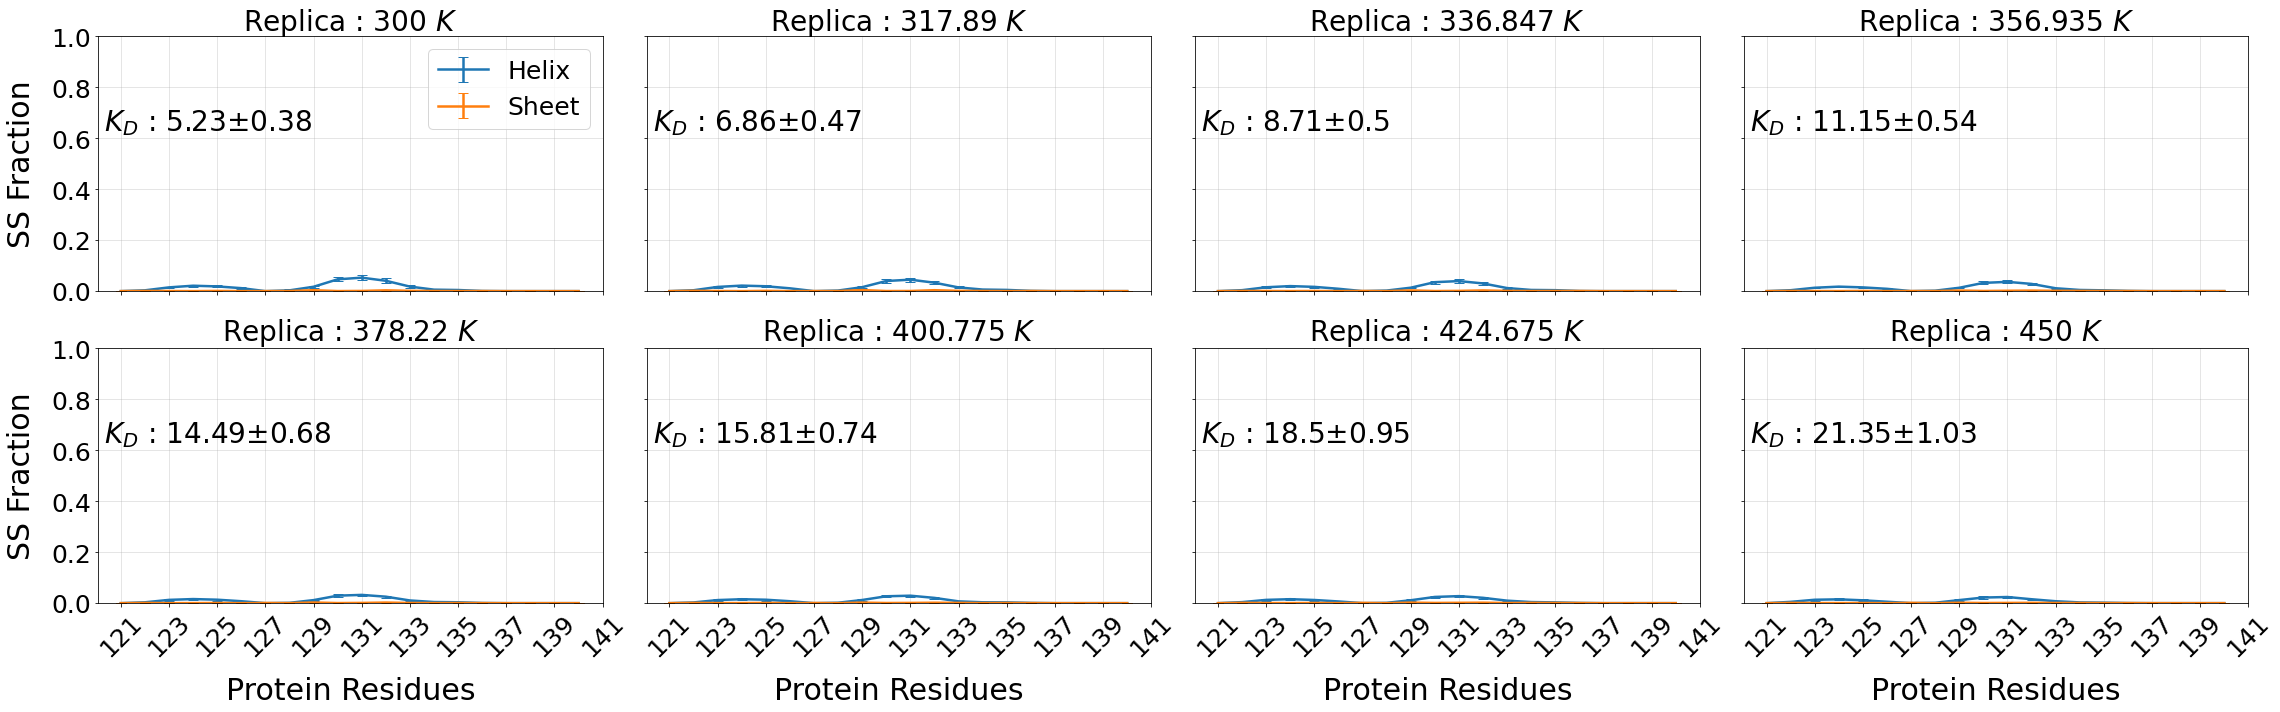

In [21]:
fig, ax = plt.subplots(2, 4, figsize=(32, 10), sharex=True, sharey=True)

for val in range(nrep):
    p, q = np.unravel_index(val,(2,4))
    
    ax[p,q].errorbar(range(121, 141),np.array(ss['rep']['helix'])[val].T[0],
                     yerr=np.array(ss['rep']['helix'])[val].T[1], capsize=5,label='Helix',linewidth=2.5)
    ax[p,q].errorbar(range(121, 141),np.array(ss['rep']['sheet'])[val].T[0],
                     yerr=np.array(ss['rep']['sheet'])[val].T[1], capsize=5,label='Sheet',linewidth=2.5)
    
    ax[p,q].tick_params(labelsize=25)
    ax[p,q].grid(alpha=0.4)
    plt.setp(ax[p,q].get_xticklabels(), rotation=45)
    ax[p,q].set_ylim(0,1.0)
    ax[p,q].set_xticks(range(121,142,2))
    ax[p,q].set_title('Replica : '+temperature[val]+' $K$',size=28)
    
    if val == 0:
        ax[p,q].legend(loc=1,prop={'size': 25})
    
    if not q : ax[p,q].set_ylabel("SS Fraction", size=30, labelpad=15)
    if p == 2-1 : ax[p,q].set_xlabel('Protein Residues', size=30, labelpad=15)
    
    text_=r'$K_{D}$'+' : '+str(round(np.array(bf_kd['rep'])[2][val],2))+r'$\pm$'+str(round(np.array(bf_kd['rep'])[3][val],2))
    ax[p,q].text(120.3, 0.63, text_, fontsize = 28)
    
plt.tight_layout()
plt.savefig(data_dir+'ss_fraction_rep.png',dpi=210)

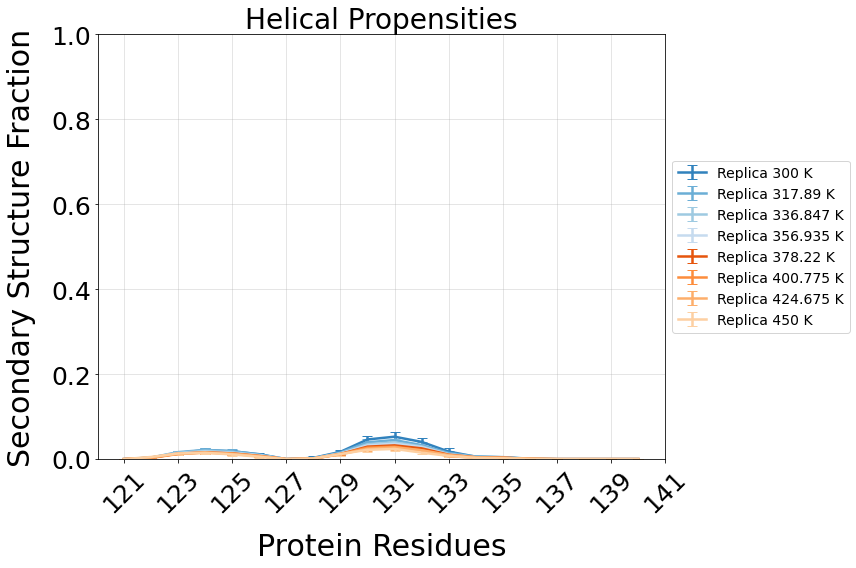

In [22]:
plt.figure(figsize=(12,8))

for val in range(nrep):
    
    plt.errorbar(range(121, 141),np.array(ss['rep']['helix'])[val].T[0],yerr=np.array(ss['rep']['helix'])[val].T[1],
                 capsize=5,label='Replica '+str(temperature[val])+' K',linewidth=2.5,c=plt.cm.tab20c(val))
    
    
plt.tick_params(labelsize=25)
plt.grid(alpha=0.4)
plt.ylim(0,1.0)
plt.xticks(range(121,142,2),rotation=45)
plt.title('Helical Propensities',size=28)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14) 
plt.ylabel("Secondary Structure Fraction", size=30, labelpad=15)
plt.xlabel('Protein Residues', size=30, labelpad=15)
    
#     text_=r'$K_{D}$'+' : '+str(round(np.array(bf_kd['rep'])[2][val],2))+r'$\pm$'+str(round(np.array(bf_kd['rep'])[3][val],2))
#     ax[p,q].text(120.3, 0.63, text_, fontsize = 28)
    
plt.tight_layout()
plt.savefig(data_dir+'ss_fraction_helix_rep.png',dpi=210)

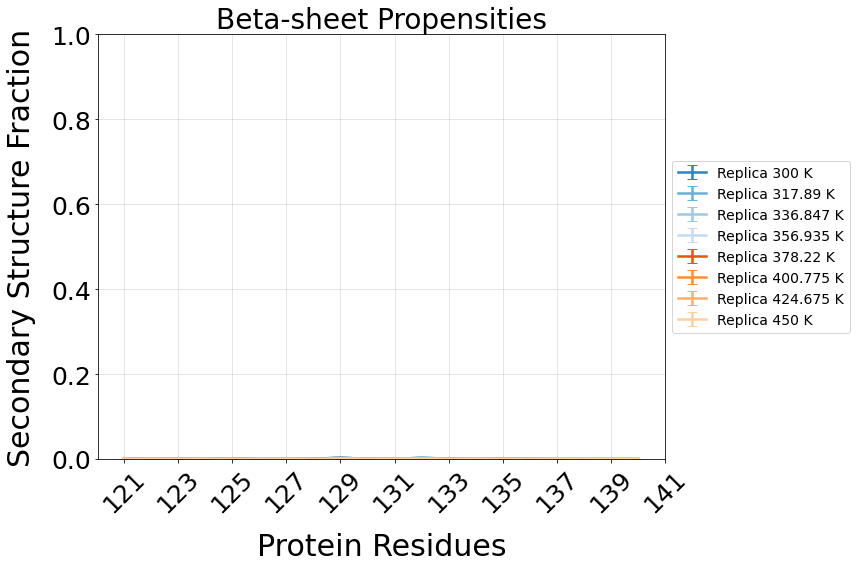

In [23]:
plt.figure(figsize=(12,8))

for val in range(nrep):
    
    plt.errorbar(range(121,141),np.array(ss['rep']['sheet'])[val].T[0],yerr=np.array(ss['rep']['sheet'])[val].T[1],
                 capsize=5,label='Replica '+str(temperature[val])+' K',linewidth=2.5,c=plt.cm.tab20c(val))
    
plt.tick_params(labelsize=25)
plt.grid(alpha=0.4)
plt.ylim(0,1.0)
plt.xticks(range(121,142,2),rotation=45)
plt.title('Beta-sheet Propensities',size=28)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14) 
plt.ylabel("Secondary Structure Fraction", size=30, labelpad=15)
plt.xlabel('Protein Residues', size=30, labelpad=15)

    
plt.tight_layout()
plt.savefig(data_dir+'ss_fraction_sheet_rep.png',dpi=210)

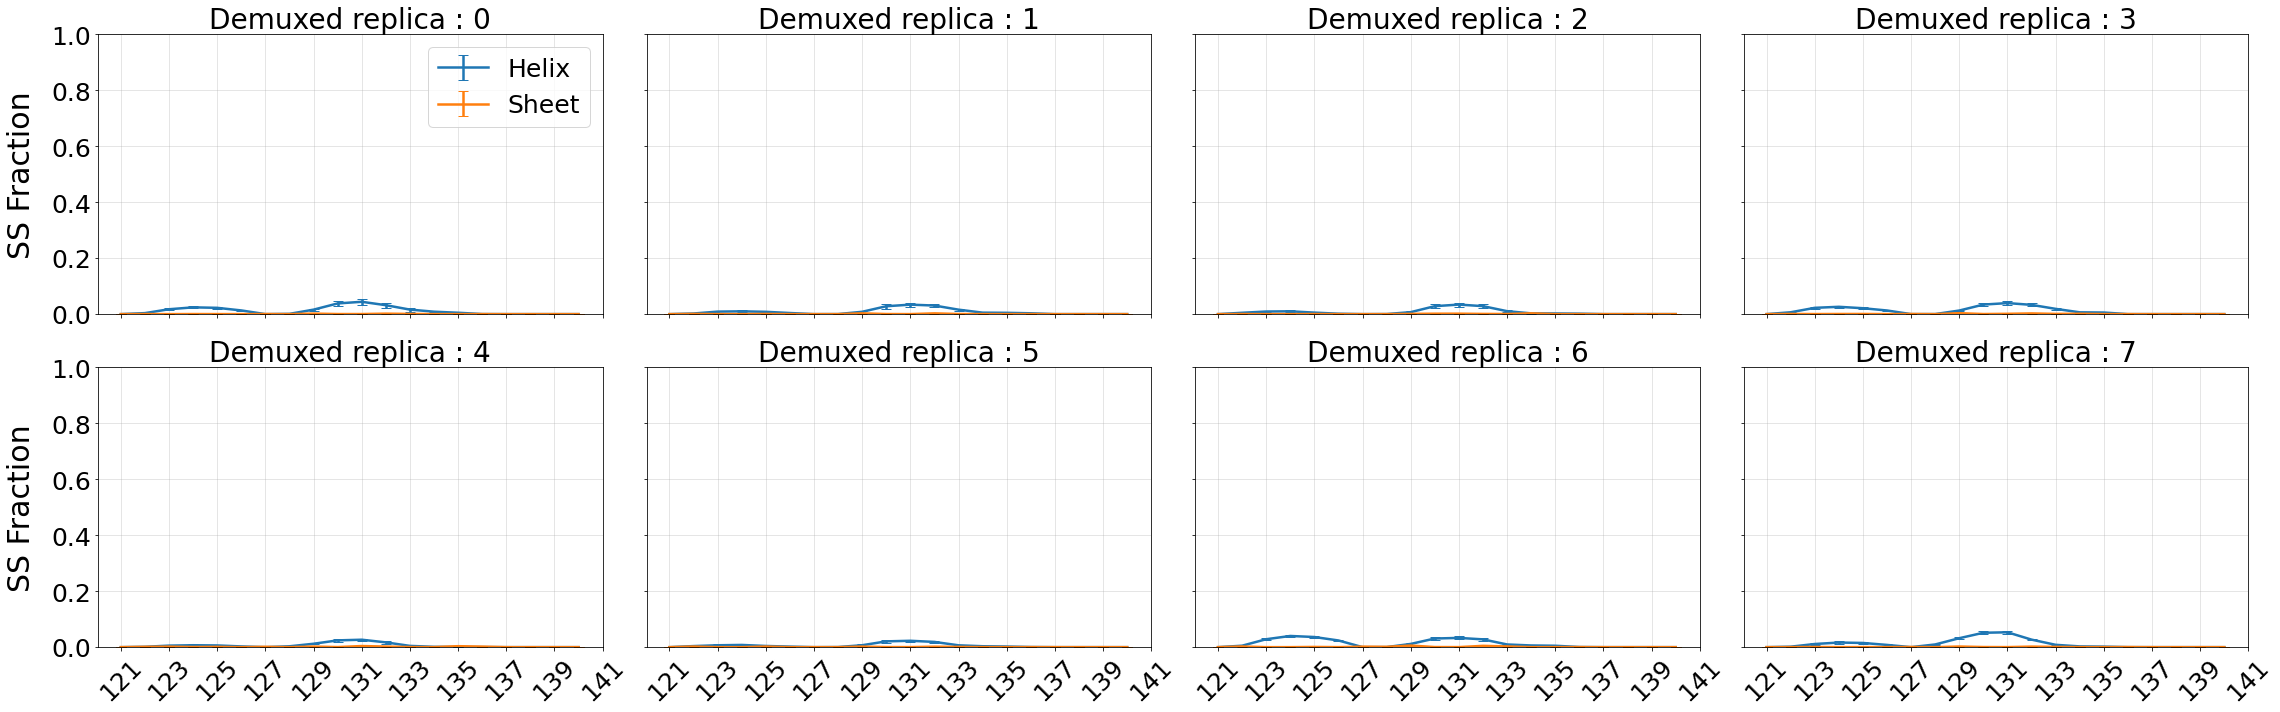

In [24]:
fig, ax = plt.subplots(2, 4, figsize=(32, 10), sharex=True, sharey=True)

for val in range(nrep):
    p, q = np.unravel_index(val,(2, 4))
    
    ax[p,q].errorbar(range(121,141),np.array(ss['demux']['helix'])[val].T[0],
                     yerr=np.array(ss['rep']['helix'])[val].T[1], capsize=5,label='Helix',linewidth=2.5)
    ax[p,q].errorbar(range(121,141),np.array(ss['demux']['sheet'])[val].T[0],
                     yerr=np.array(ss['rep']['sheet'])[val].T[1], capsize=5,label='Sheet',linewidth=2.5)
    
    ax[p,q].tick_params(labelsize=25)
    ax[p,q].grid(alpha=0.4)
    plt.setp(ax[p,q].get_xticklabels(), rotation=45)
    ax[p,q].set_ylim(0,1.0)
    ax[p,q].set_xticks(range(121,142,2))
    ax[p,q].set_title('Demuxed replica : '+str(val),size=28)
    
    if val == 0:
        ax[p,q].legend(loc=1,prop={'size': 25})
    
    if not q : ax[p,q].set_ylabel("SS Fraction", size=30, labelpad=15)
    if p == 5-1 : ax[p,q].set_xlabel('Protein Residues', size=30, labelpad=15)
    
#     text_=r'$K_{D}$'+' : '+str(round(np.array(bf_kd['rep'])[2][val],2))+r'$\pm$'+str(round(np.array(bf_kd['rep'])[3][val],2))
#     ax[p,q].text(120.3, 0.63, text_, fontsize = 28)
    
plt.tight_layout()

plt.savefig(data_dir+'ss_fraction_demux.png',dpi=210)

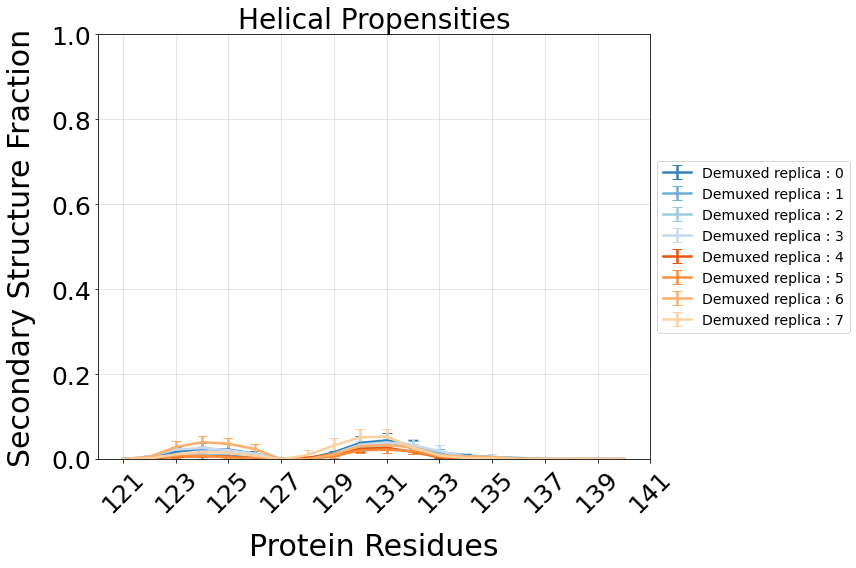

In [25]:
plt.figure(figsize=(12,8))

for val in range(nrep):
    
    plt.errorbar(range(121, 141),np.array(ss['demux']['helix'])[val].T[0],yerr=np.array(ss['demux']['helix'])[val].T[1],
                 capsize=5,label='Demuxed replica : '+str(val),linewidth=2.5,c=plt.cm.tab20c(val))
    
    
plt.tick_params(labelsize=25)
plt.grid(alpha=0.4)
plt.ylim(0,1.0)
plt.xticks(range(121,142,2),rotation=45)
plt.title('Helical Propensities',size=28)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14) 
plt.ylabel("Secondary Structure Fraction", size=30, labelpad=15)
plt.xlabel('Protein Residues', size=30, labelpad=15)
    
#     text_=r'$K_{D}$'+' : '+str(round(np.array(bf_kd['rep'])[2][val],2))+r'$\pm$'+str(round(np.array(bf_kd['rep'])[3][val],2))
#     ax[p,q].text(120.3, 0.63, text_, fontsize = 28)
    
plt.tight_layout()
plt.savefig(data_dir+'ss_fraction_helix_demux.png',dpi=210)

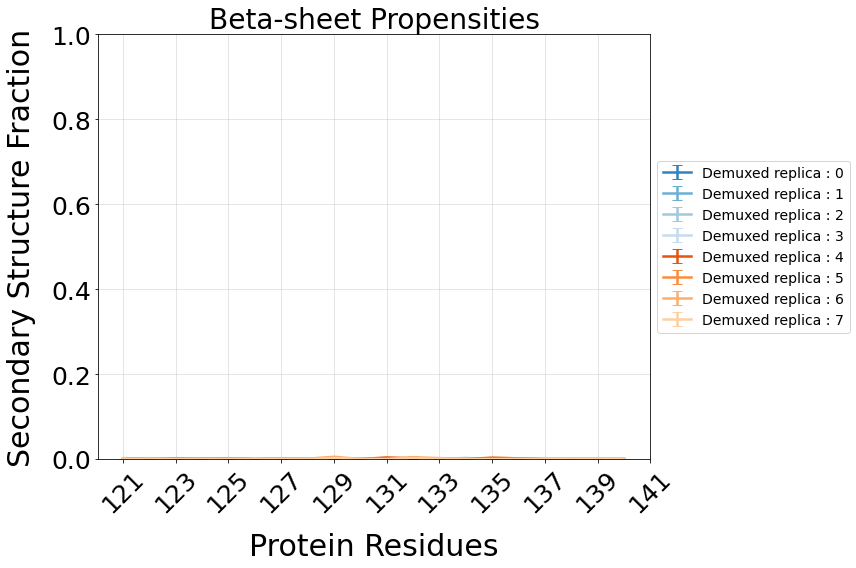

In [26]:
plt.figure(figsize=(12,8))

for val in range(nrep):
    
    plt.errorbar(range(121,141),np.array(ss['demux']['sheet'])[val].T[0],yerr=np.array(ss['demux']['sheet'])[val].T[1],
                 capsize=5,label='Demuxed replica : '+str(val),linewidth=2.5,c=plt.cm.tab20c(val))
    
plt.tick_params(labelsize=25)
plt.grid(alpha=0.4)
plt.ylim(0,1.0)
plt.xticks(range(121,142,2),rotation=45)
plt.title('Beta-sheet Propensities',size=28)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14) 
plt.ylabel("Secondary Structure Fraction", size=30, labelpad=15)
plt.xlabel('Protein Residues', size=30, labelpad=15)

    
plt.tight_layout()
plt.savefig(data_dir+'ss_fraction_sheet_demux.png',dpi=210)

In [27]:
phipsi=json.load(open(data_dir+'phipsi.json','r'))

phipsi_a=np.loadtxt(data_dir_a+'phipsi.dat')

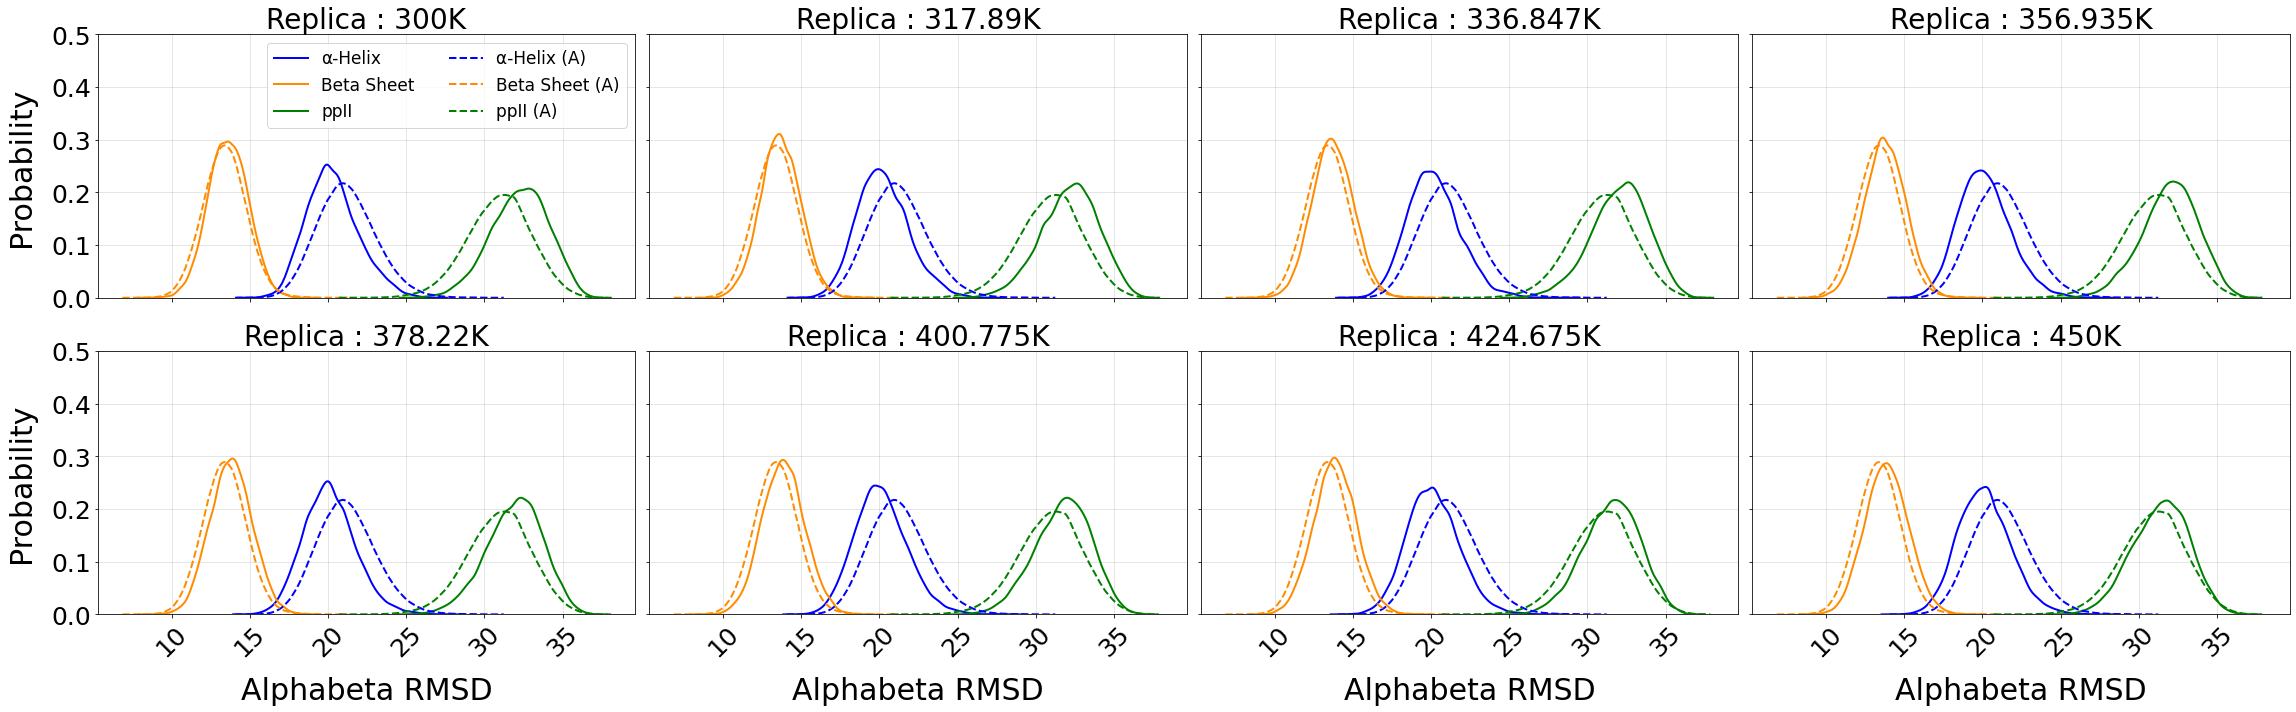

In [28]:
fig, ax = plt.subplots(2, 4, figsize=(32, 10), sharex=True, sharey=True)


for val in range(nrep):
    p, q = np.unravel_index(val,(2, 4))
    
    sns.kdeplot(data=np.array(phipsi['rep'])[val][0], label='α-Helix',ax=ax[p,q], linewidth=2,c='b')
    sns.kdeplot(data=np.array(phipsi['rep'])[val][1], label='Beta Sheet',ax=ax[p,q], linewidth=2,c='darkorange')
    sns.kdeplot(data=np.array(phipsi['rep'])[val][2], label='ppII',ax=ax[p,q], linewidth=2,c='g')
    
    sns.kdeplot(data=phipsi_a.T[0], label='α-Helix (A)',ax=ax[p,q], linewidth=2, linestyle='--',c='b')
    sns.kdeplot(data=phipsi_a.T[1], label='Beta Sheet (A)',ax=ax[p,q], linewidth=2, linestyle='--',c='darkorange')
    sns.kdeplot(data=phipsi_a.T[2], label='ppII (A)',ax=ax[p,q], linewidth=2, linestyle='--',c='g')
    
    ax[p, q].set_ylim(0,0.5)
    #ax[p, q].set_xticks(range(121,142,2))
    ax[p,q].tick_params(labelsize=25)
    ax[p,q].grid(alpha=0.4)
    plt.setp(ax[p,q].get_xticklabels(), rotation=45)
    
    if val == 0:
        ax[p,q].legend(loc=1,prop={'size': 17},ncol=2)

    a='Replica : '+temperature[val]+'K'
    ax[p,q].set_title(a,size=28)
    
#     text_=r'$K_{D}$'+' : '+str(round(np.array(bf_kd['rep'])[2][val],2))+r'$\pm$'+str(round(np.array(bf_kd['rep'])[3][val],2))
#     ax[p,q].text(120.3, 0.43, text_, fontsize = 26)
    
    if not q : ax[p,q].set_ylabel("Probability", size=30, labelpad=15)
    if p == 2-1 : ax[p,q].set_xlabel('Alphabeta RMSD', size=30, labelpad=15)
        


        
plt.tight_layout()

plt.savefig(data_dir+'ss_rmsd_rep.png',dpi=210)


In [29]:
kd_time=json.load(open(data_dir+'kd_timecourse.json','r'))

In [30]:
for i in range(nrep): print(np.where(np.array(kd_time['rep'])[i].T[1]==np.inf)[0])

[]
[0 1 2]
[]
[0 1]
[]
[0]
[]
[0 1 2]


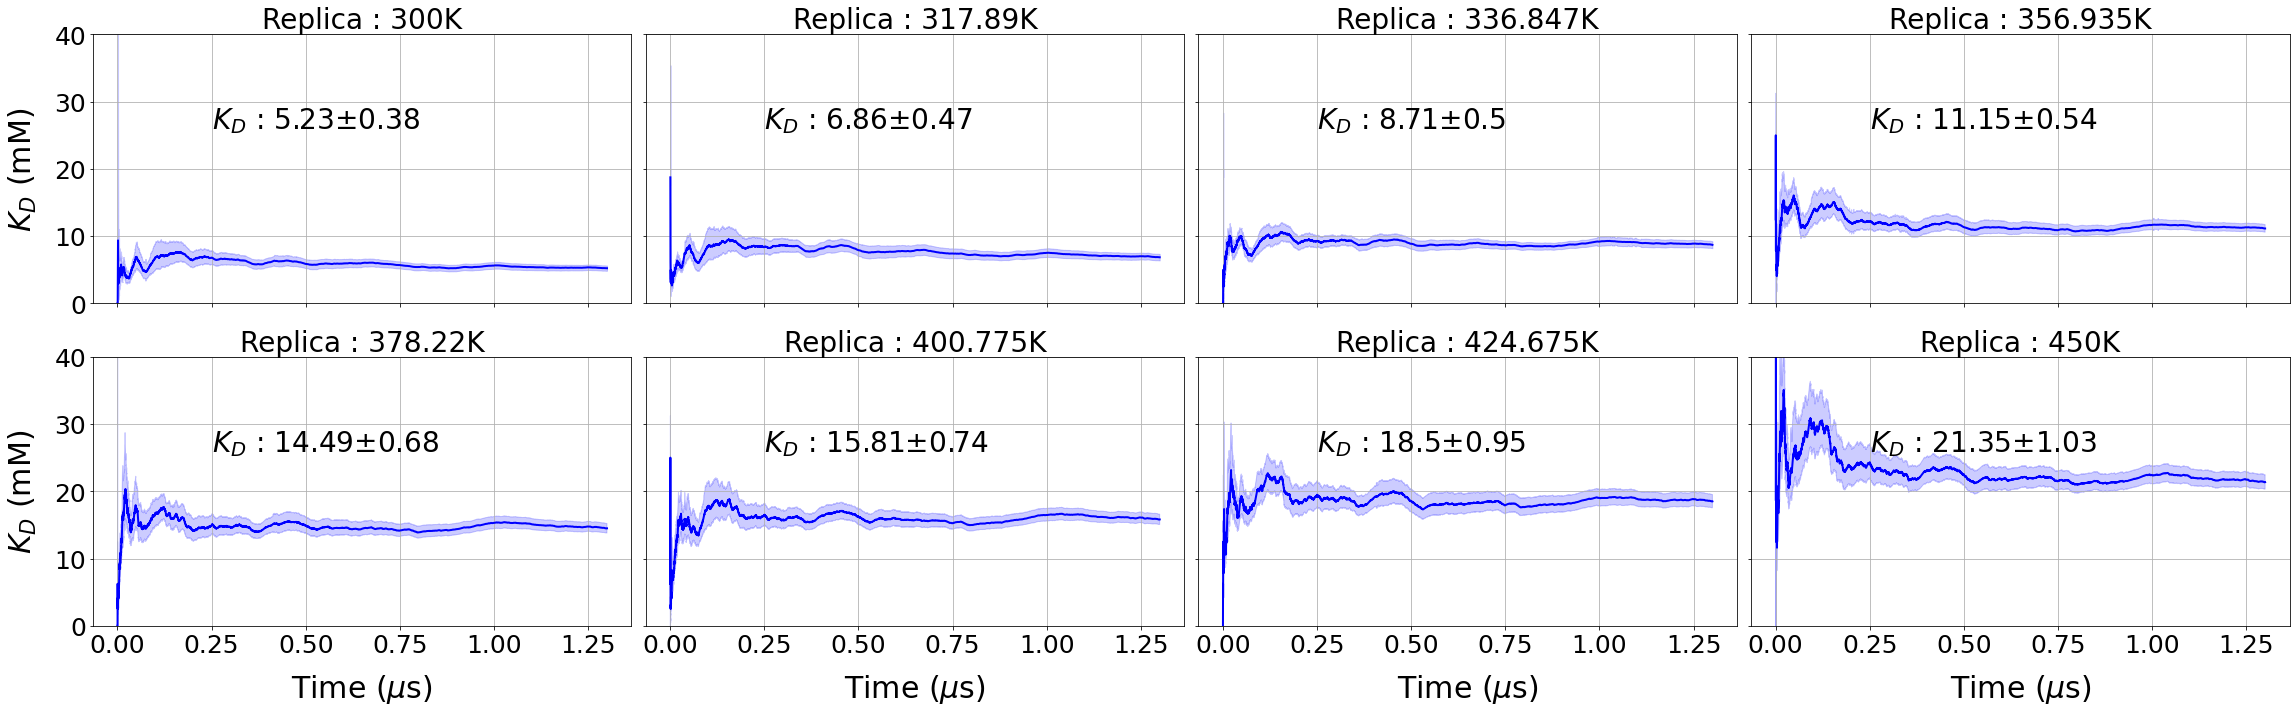

In [31]:
fig, ax = plt.subplots(2,4, figsize=(32, 10), sharex=True, sharey=True)

i='rep'

for val in range(nrep):
    p, q = np.unravel_index(val,(2, 4))
    
    inf_start=len(np.where(np.array(kd_time[i])[val].T[4]==0)[0])

    ax[p,q].plot(np.array(kd_time[i])[val].T[0][inf_start::], np.array(kd_time[i])[val].T[1][inf_start::], 
                 color='blue',linewidth=2)
    ax[p,q].fill_between(np.array(kd_time[i])[val].T[0][inf_start::],np.array(kd_time[i])[val].T[2][inf_start::], 
                     np.array(kd_time[i])[val].T[3][inf_start::],color='blue', alpha=0.2)

    

    ax[p,q].grid()
    ax[p, q].set_ylim(0, 40.0)
    ax[p,q].tick_params(labelsize=25)
    #plt.setp(ax[p,q].get_xticklabels(), rotation=45)
    
    a='Replica : '+temperature[val]+'K'
    ax[p,q].set_title(a,size=28)
    
    text_=r'$K_{D}$'+' : '+str(round(np.array(bf_kd['rep'])[2][val],2))+r'$\pm$'+str(round(np.array(bf_kd['rep'])[3][val],2))
    ax[p,q].text(0.25, 26, text_, fontsize = 28)
    
    if not q : ax[p,q].set_ylabel('$K_D$ (mM)', size=30, labelpad=15)
    if p == 2-1 : ax[p,q].set_xlabel('Time ($\mu$s)', size=30, labelpad=15)
        
    
plt.tight_layout()

plt.savefig(data_dir+'kd_timecourse.png',dpi=210)

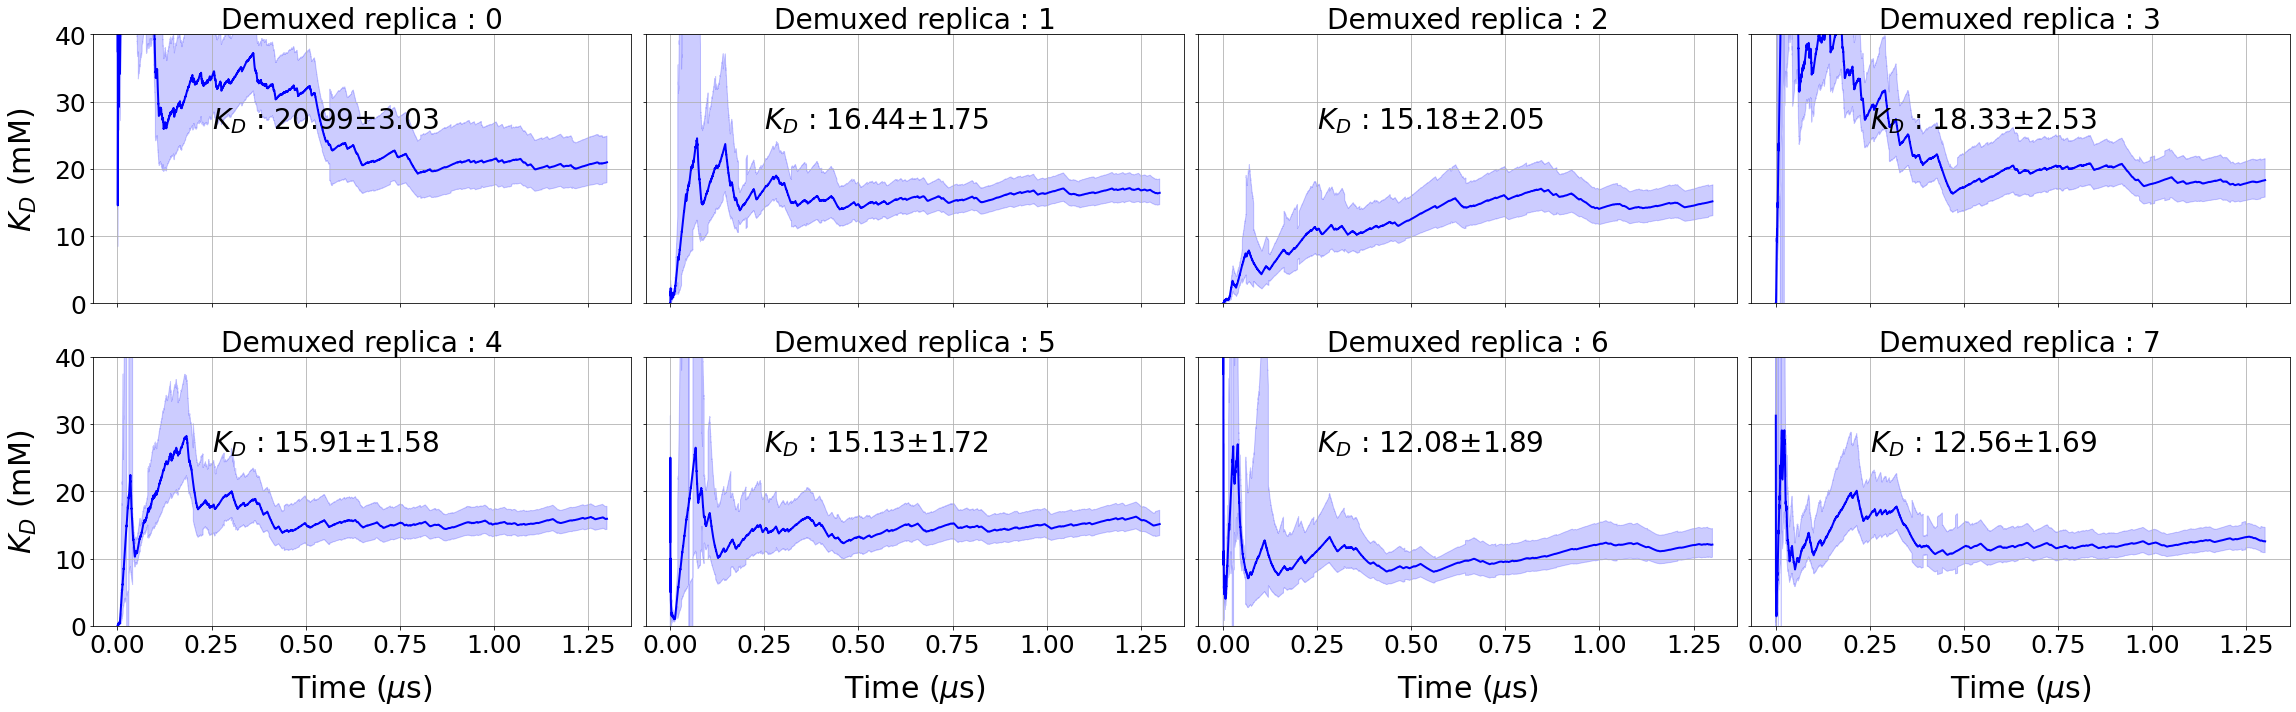

In [29]:
fig, ax = plt.subplots(2,4, figsize=(32, 10), sharex=True, sharey=True)

i='demux'

for val in range(nrep):
    p, q = np.unravel_index(val,(2, 4))
    
    inf_start=len(np.where(np.array(kd_time[i])[val].T[4]==0)[0])

    ax[p,q].plot(np.array(kd_time[i])[val].T[0][inf_start::], np.array(kd_time[i])[val].T[1][inf_start::], 
                 color='blue',linewidth=2)
    ax[p,q].fill_between(np.array(kd_time[i])[val].T[0][inf_start::],np.array(kd_time[i])[val].T[2][inf_start::], 
                     np.array(kd_time[i])[val].T[3][inf_start::],color='blue', alpha=0.2)

    

    ax[p,q].grid()
    ax[p, q].set_ylim(0, 40.0)
    ax[p,q].tick_params(labelsize=25)
    #plt.setp(ax[p,q].get_xticklabels(), rotation=45)
    
    a='Demuxed replica : '+str(val)
    ax[p,q].set_title(a,size=28)
    
    text_=r'$K_{D}$'+' : '+str(round(np.array(bf_kd['demux'])[2][val],2))+r'$\pm$'+str(round(np.array(bf_kd['demux'])[3][val],2))
    ax[p,q].text(0.25, 26, text_, fontsize = 28)
    
    if not q : ax[p,q].set_ylabel('$K_D$ (mM)', size=30, labelpad=15)
    if p == 2-1 : ax[p,q].set_xlabel('Time ($\mu$s)', size=30, labelpad=15)
        
    
plt.tight_layout()

plt.savefig(data_dir+'kd_timecourse_demux.png',dpi=210)

In [30]:
for i in range(nrep):
    print(np.insert(np.array(kd_time['rep'])[val].T[0],0,0.00))

time=np.insert(np.array(kd_time['rep'])[0].T[0],0,0.00)
time

[0.00000000e+00 7.86496461e-05 1.57299292e-04 ... 1.29984270e+00
 1.29992135e+00 1.30000000e+00]
[0.00000000e+00 7.86496461e-05 1.57299292e-04 ... 1.29984270e+00
 1.29992135e+00 1.30000000e+00]
[0.00000000e+00 7.86496461e-05 1.57299292e-04 ... 1.29984270e+00
 1.29992135e+00 1.30000000e+00]
[0.00000000e+00 7.86496461e-05 1.57299292e-04 ... 1.29984270e+00
 1.29992135e+00 1.30000000e+00]
[0.00000000e+00 7.86496461e-05 1.57299292e-04 ... 1.29984270e+00
 1.29992135e+00 1.30000000e+00]
[0.00000000e+00 7.86496461e-05 1.57299292e-04 ... 1.29984270e+00
 1.29992135e+00 1.30000000e+00]
[0.00000000e+00 7.86496461e-05 1.57299292e-04 ... 1.29984270e+00
 1.29992135e+00 1.30000000e+00]
[0.00000000e+00 7.86496461e-05 1.57299292e-04 ... 1.29984270e+00
 1.29992135e+00 1.30000000e+00]


array([0.00000000e+00, 7.86496461e-05, 1.57299292e-04, ...,
       1.29984270e+00, 1.29992135e+00, 1.30000000e+00])

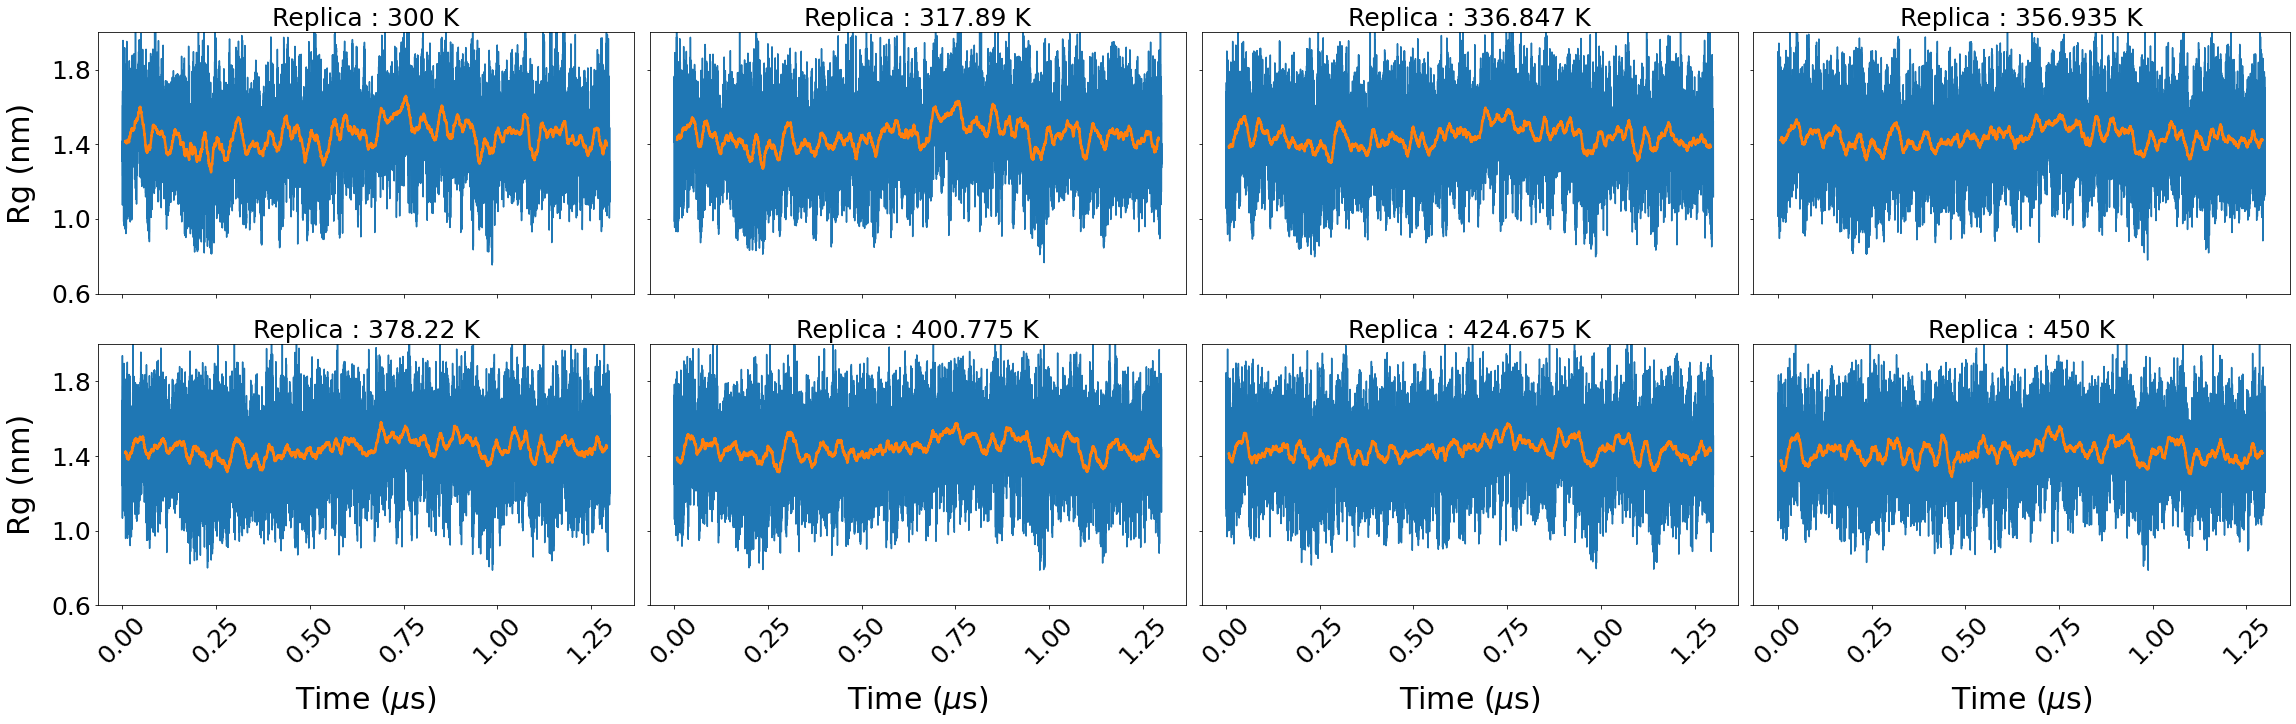

In [31]:
fig, ax = plt.subplots(2, 4, figsize=(32, 10), sharex=True, sharey=True)

i='rep'
N=200

for val in range(nrep):
    p, q = np.unravel_index(val,(2, 4))
    
    ax[p,q].plot(time,np.array(rg[i])[val])
    ax[p,q].plot(np.convolve(time, np.ones(N)/N, mode='valid'),
                 np.convolve(np.array(rg[i])[val], np.ones(N)/N, mode='valid'),linewidth=2.5)
    
    ax[p,q].tick_params(labelsize=25)
    plt.setp(ax[p,q].get_xticklabels(), rotation=45)
    ax[p,q].set_ylim(0.6,2.0)
    #ax[p,q].set_xticks(range(0,142,2))
    ax[p,q].set_yticks(np.arange(0.6,2.2,0.4))
    
    ax[p,q].set_title('Replica : '+temperature[val]+' K',size=25)

    if not q : ax[p,q].set_ylabel("Rg (nm)", size=30, labelpad=15)
    if p == 2-1 : ax[p,q].set_xlabel('Time ($\mu$s)', size=30, labelpad=15)
        
plt.tight_layout()

plt.savefig(data_dir+'rg_rep.png',dpi=210)

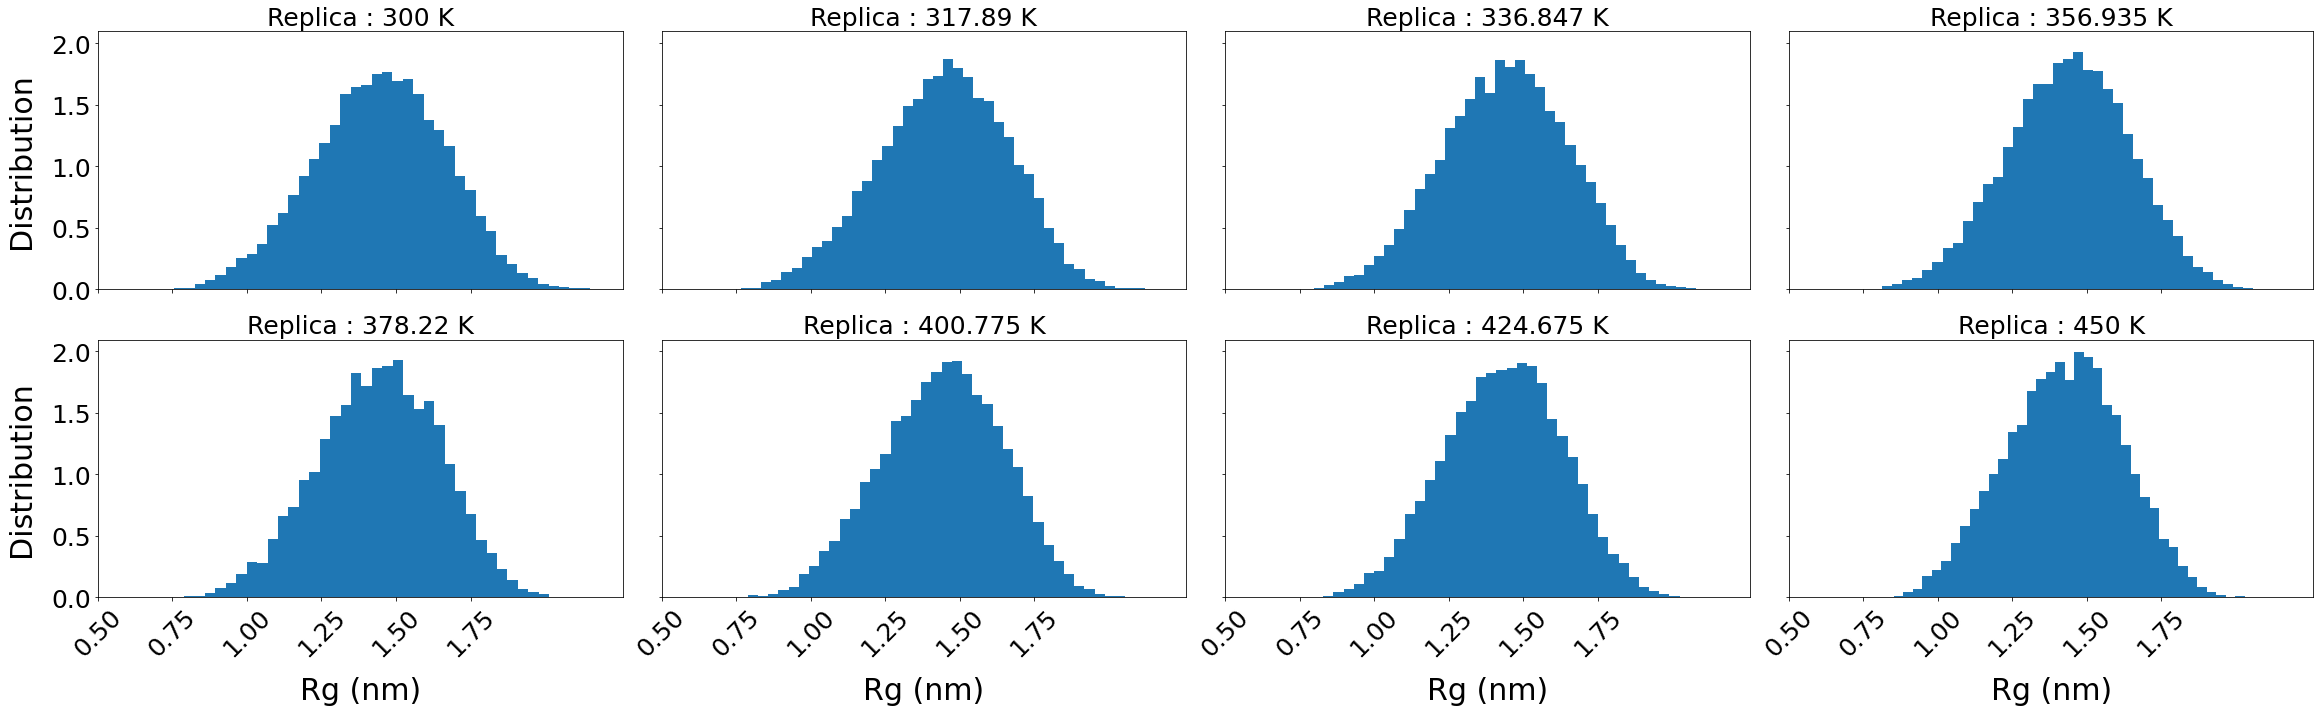

In [32]:
fig, ax = plt.subplots(2, 4, figsize=(32, 10), sharex=True, sharey=True)

i='rep'
N=200

for val in range(nrep):
    p, q = np.unravel_index(val,(2, 4))
    
    ax[p,q].hist(np.array(rg[i])[val], bins=40, density=True)
    
    ax[p,q].tick_params(labelsize=25)
    plt.setp(ax[p,q].get_xticklabels(), rotation=45)
#    ax[p,q].set_ylim(0.6,2.0)
    ax[p,q].set_xticks(np.arange(0.5,2.0,0.25))
#    ax[p,q].set_yticks(np.arange(0.6,2.2,0.4))
    
    ax[p,q].set_title('Replica : '+temperature[val]+' K',size=25)

    if not q : ax[p,q].set_ylabel("Distribution", size=30, labelpad=15)
    if p == 2-1 : ax[p,q].set_xlabel('Rg (nm)', size=30, labelpad=15)
        
plt.tight_layout()

plt.savefig(data_dir+'rg_hist_rep.png',dpi=210)

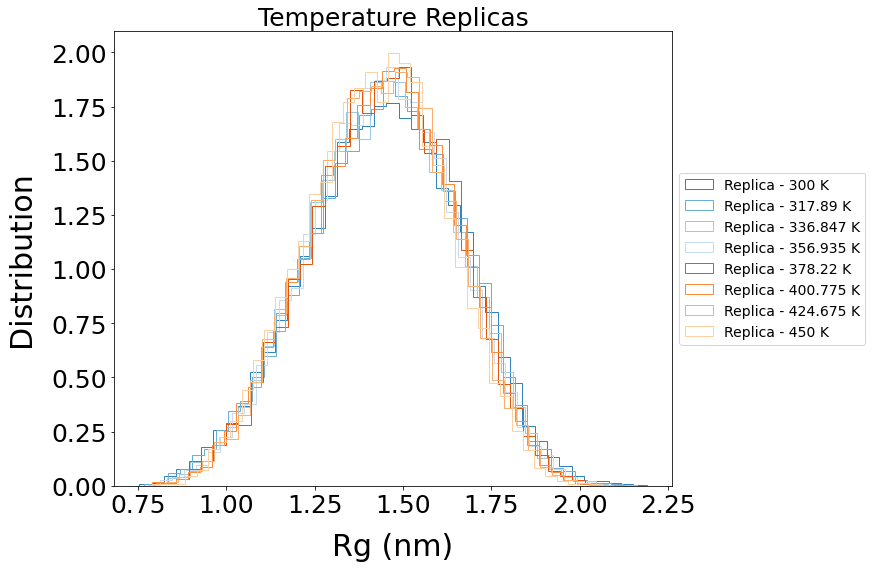

In [33]:
plt.figure(figsize=(12,8))

i='rep'

for val in range(nrep):
    if i=='rep': 
        label_="Replica - "+str(temperature[val])+' K'  
    else:
        label_="Demux Replica - "+str(val)
    
    plt.hist(np.array(rg[i])[val],bins=40,density=True,histtype='step',color=plt.cm.tab20c(val),label=label_)
    
    plt.tick_params(labelsize=25)
    plt.setp(ax[p,q].get_xticklabels(), rotation=45)
    #ax[p,q].set_ylim(1,4)
    #ax[p,q].set_xticks(range(0,142,2))
    #ax[p,q].set_yticks(np.arange(1.0,4.0,0.4))
    
plt.title('Temperature Replicas',size=25)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.ylabel("Distribution", size=30, labelpad=15)
plt.xlabel('Rg (nm)', size=30, labelpad=15)
        
plt.tight_layout()

plt.savefig(data_dir+'rg_rep_hist_all.png',dpi=210)

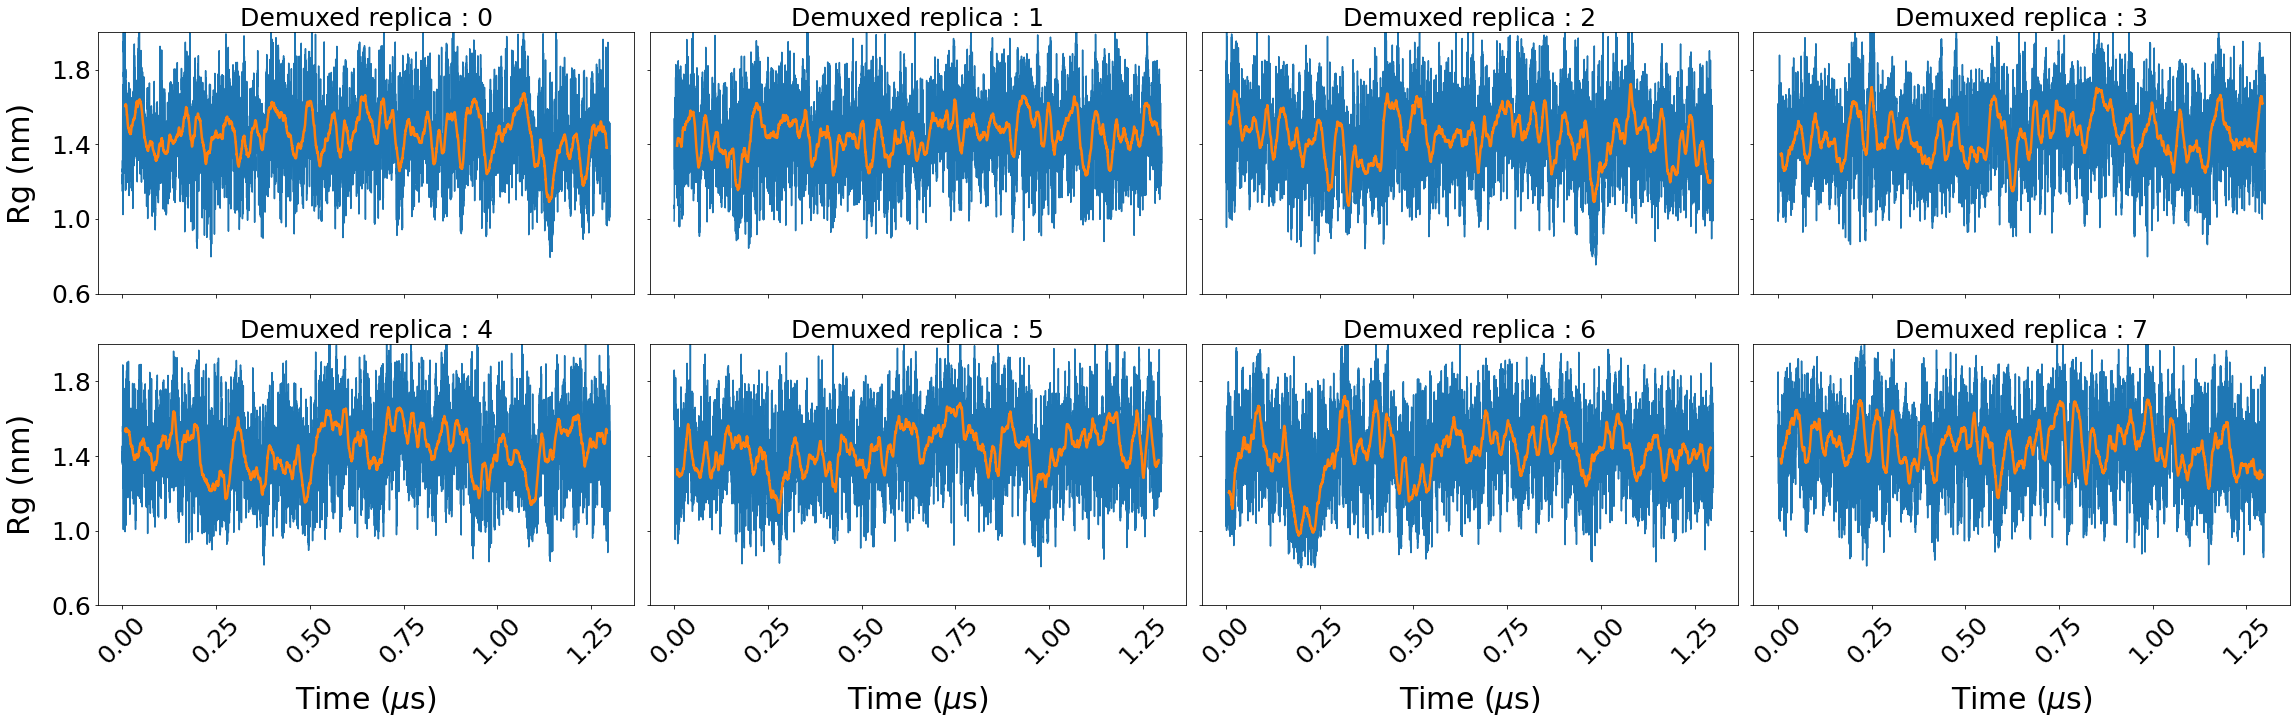

In [34]:
fig, ax = plt.subplots(2, 4, figsize=(32, 10), sharex=True, sharey=True)

i='demux'
N=200

for val in range(nrep):
    p, q = np.unravel_index(val,(2, 4))
    
    ax[p,q].plot(time,np.array(rg[i])[val])
    ax[p,q].plot(np.convolve(time, np.ones(N)/N, mode='valid'),
                 np.convolve(np.array(rg[i])[val], np.ones(N)/N, mode='valid'),linewidth=2.5)
    
    ax[p,q].tick_params(labelsize=25)
    plt.setp(ax[p,q].get_xticklabels(), rotation=45)
    ax[p,q].set_ylim(0.6,2.0)
    #ax[p,q].set_xticks(range(0,142,2))
    ax[p,q].set_yticks(np.arange(0.6,2.2,0.4))
    
    ax[p,q].set_title('Demuxed replica : '+str(val),size=25)

    if not q : ax[p,q].set_ylabel("Rg (nm)", size=30, labelpad=15)
    if p == 2-1 : ax[p,q].set_xlabel('Time ($\mu$s)', size=30, labelpad=15)
        
plt.tight_layout()

plt.savefig(data_dir+'rg_demux.png',dpi=210)

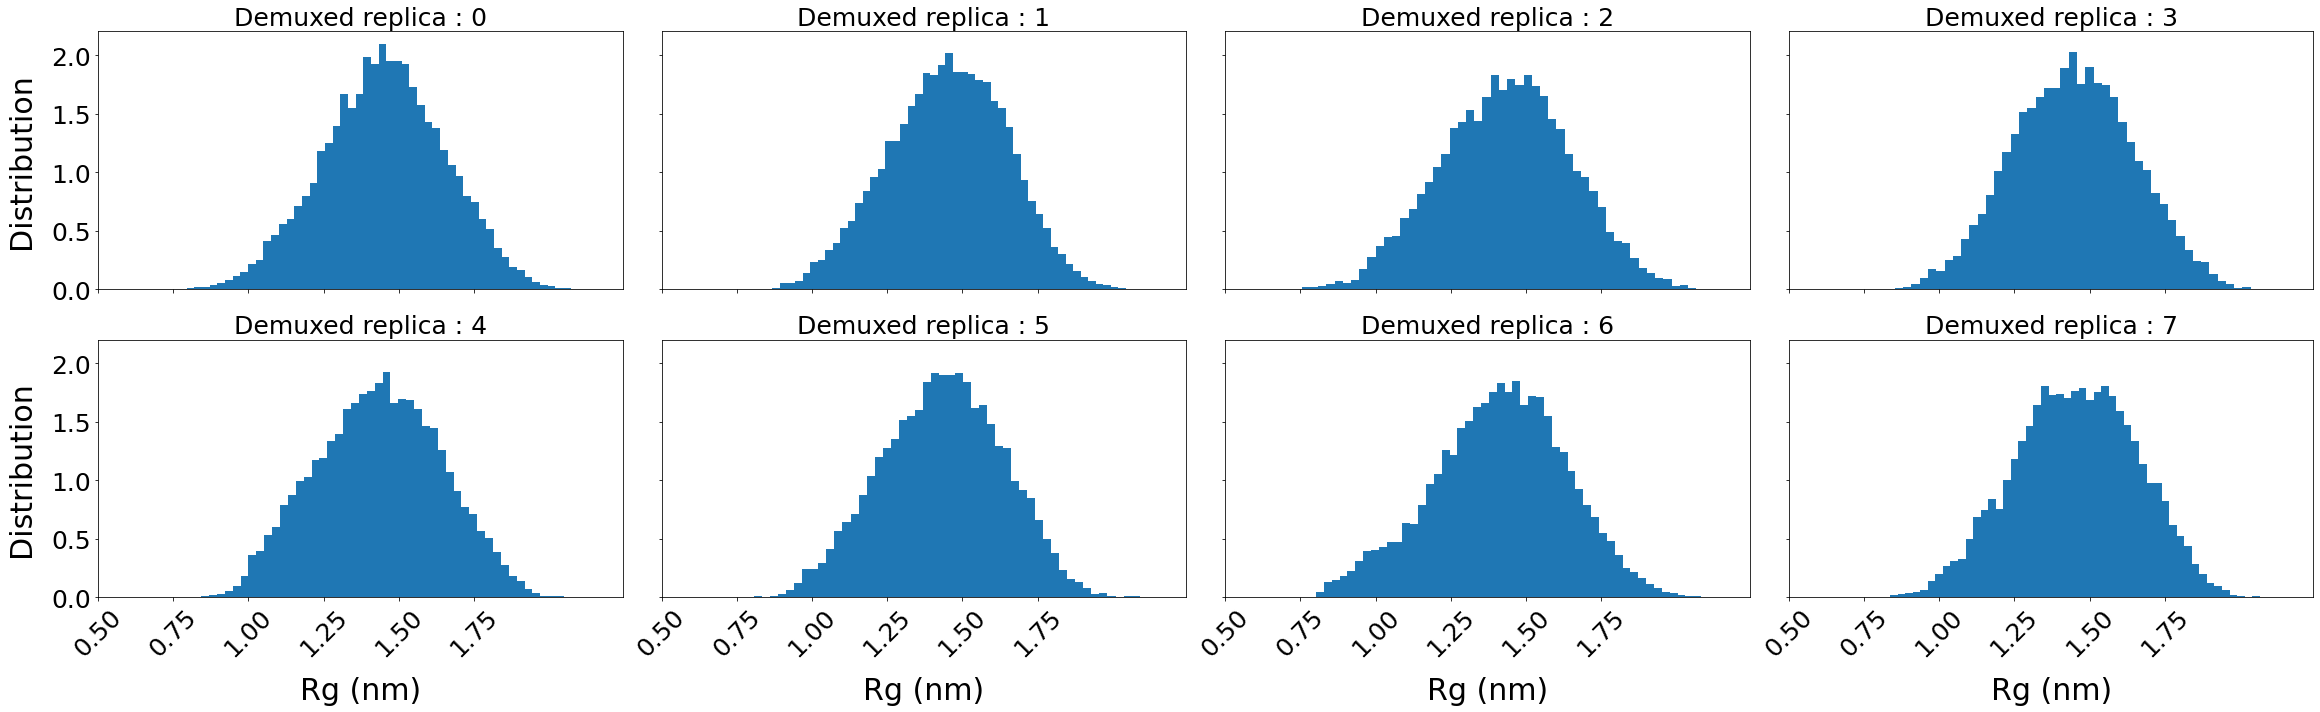

In [35]:
fig, ax = plt.subplots(2,4, figsize=(32, 10), sharex=True, sharey=True)

i='demux'
N=200

for val in range(nrep):
    p, q = np.unravel_index(val,(2, 4))
    
    ax[p,q].hist(np.array(rg[i])[val], bins=50, density=True)
    
    ax[p,q].tick_params(labelsize=25)
    plt.setp(ax[p,q].get_xticklabels(), rotation=45)
#    ax[p,q].set_ylim(0.6,2.0)
    ax[p,q].set_xticks(np.arange(0.5,2.0,0.25))
#    ax[p,q].set_yticks(np.arange(0.6,2.2,0.4))
    
    ax[p,q].set_title('Demuxed replica : '+str(val),size=25)


    if not q : ax[p,q].set_ylabel("Distribution", size=30, labelpad=15)
    if p == 2-1 : ax[p,q].set_xlabel('Rg (nm)', size=30, labelpad=15)
        
plt.tight_layout()

plt.savefig(data_dir+'rg_hist_demux.png',dpi=210)

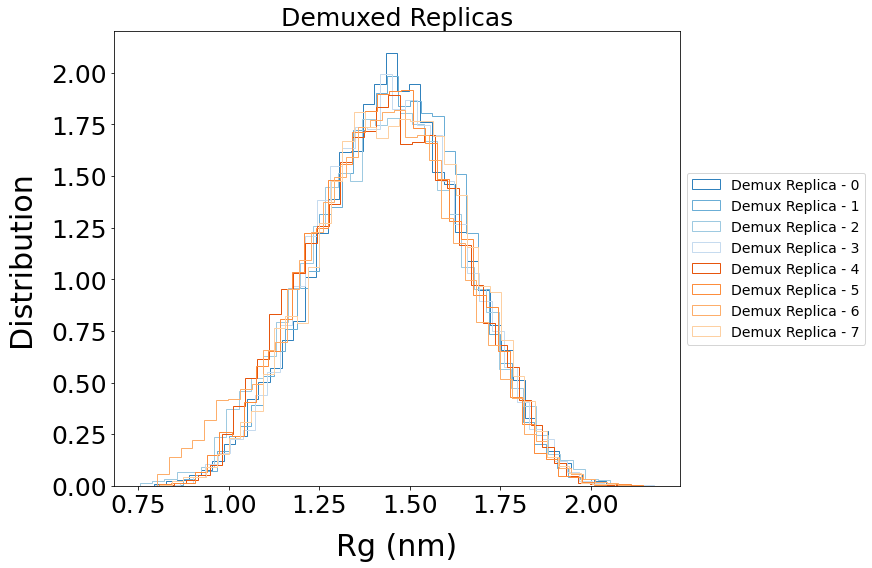

In [36]:
plt.figure(figsize=(12,8))

i='demux'

for val in range(nrep):
    
    if i=='rep': 
        label_="Replica - "+str(temperature[val])+' K'  
    else:
        label_="Demux Replica - "+str(val)
    
    plt.hist(np.array(rg[i])[val],bins=40,density=True,histtype='step',color=plt.cm.tab20c(val),label=label_)
    
    plt.tick_params(labelsize=25)
    plt.setp(ax[p,q].get_xticklabels(), rotation=45)
    #ax[p,q].set_ylim(1,4)
    #ax[p,q].set_xticks(range(0,142,2))
    #ax[p,q].set_yticks(np.arange(1.0,4.0,0.4))
    
plt.title('Demuxed Replicas',size=25)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.ylabel("Distribution", size=30, labelpad=15)
plt.xlabel('Rg (nm)', size=30, labelpad=15)
        
plt.tight_layout()

plt.savefig(data_dir+'rg_demux_hist_all.png',dpi=210)

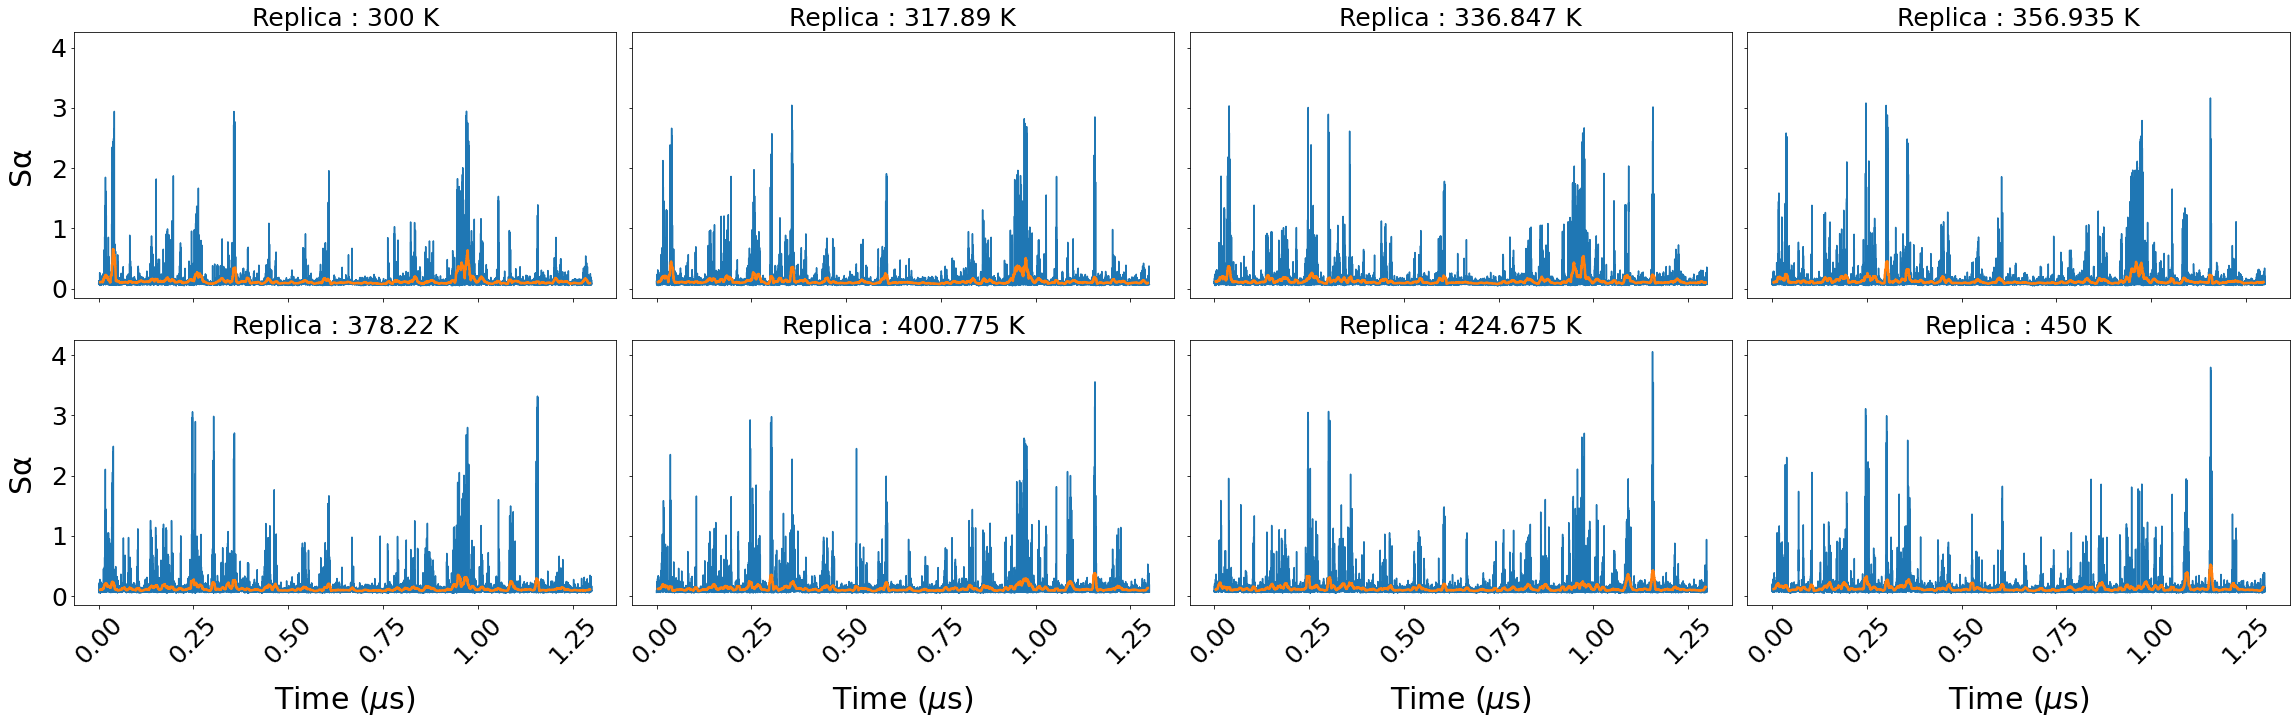

In [37]:
fig, ax = plt.subplots(2, 4, figsize=(32, 10), sharex=True, sharey=True)

i='rep'
N=100

for val in range(nrep):
    p, q = np.unravel_index(val,(2, 4))
    
    X=np.sum(np.array(sa[i])[val],axis=0)
    
    ax[p,q].plot(time,X)
    ax[p,q].plot(np.convolve(time, np.ones(N)/N, mode='valid'),
                 np.convolve(X, np.ones(N)/N, mode='valid'),linewidth=2.5)
    
    ax[p,q].tick_params(labelsize=25)
    plt.setp(ax[p,q].get_xticklabels(), rotation=45)
    #ax[p,q].set_ylim(0.6,2.0)
    #ax[p,q].set_xticks(range(0,142,2))
    #ax[p,q].set_yticks(np.arange(0.6,2.2,0.4))
    
    ax[p,q].set_title('Replica : '+temperature[val]+' K',size=25)

    if not q : ax[p,q].set_ylabel("Sα", size=30, labelpad=15)
    if p == 2-1 : ax[p,q].set_xlabel('Time ($\mu$s)', size=30, labelpad=15)
        
plt.tight_layout()

plt.savefig(data_dir+'sa_rep.png',dpi=210)

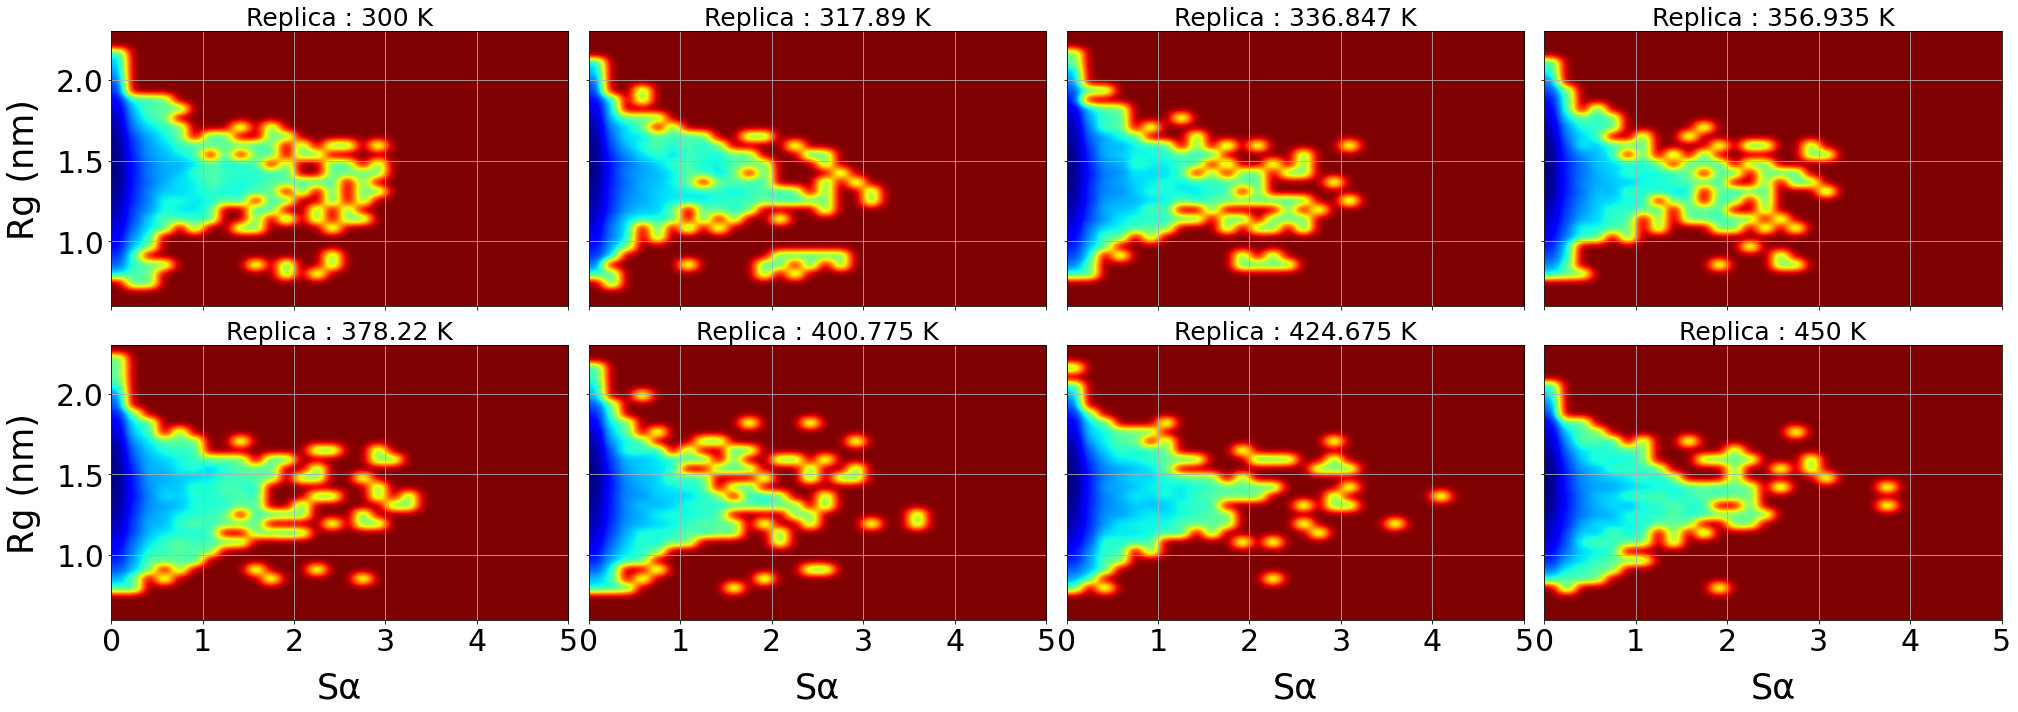

In [41]:
fig, ax = plt.subplots(2, 4, figsize=(28, 10), sharex=True, sharey=True)

i='rep'

#cbar_ax = fig.add_axes([.91, .3, .03, .4])

for val in range(nrep):
    p, q = np.unravel_index(val,(2, 4))
    
    X=np.sum(np.array(sa[i])[val],axis=0)
    
    a, xedges, yedges = np.histogram2d(np.array(rg[i])[val], X, 30, [[0.6, 2.3], [0, 5.0]],
                                       normed=True, weights=None)
    
    a = np.log(np.flipud(a)+.000001)
    T = 300
    a = -(0.001987*T)*a
    

    im=subplot_imshow(a, xedges, yedges, ax=ax[p,q])
    
    
    cbar_ticks = [0, 1, 2, 3, 4, 5]
    #cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),aspect=10,cax=cbar_ax,ax=ax[p,q])
    
    #subplot_imshow(a, xedges, yedges,ax=ax[p,q],cbar_ax=cbar_ax,cbar=cb)
    
    imaxes = plt.gca()
    
    ax[p,q].tick_params(labelsize=30)
    #plt.setp(ax[p,q].get_xticklabels())
    ax[p,q].grid()
    #ax[p,q].set_ylim(0.6,2.0)
    #ax[p,q].set_xticks(range(0,142,2))
    #ax[p,q].set_yticks(np.arange(0.6,2.2,0.4))
    
    ax[p,q].set_title('Replica : '+temperature[val]+' K',size=25)

    if not q : ax[p,q].set_ylabel('Rg (nm)', size=35, labelpad=15)
    if p == 2-1 : ax[p,q].set_xlabel("Sα", size=35, labelpad=15)
        
plt.tight_layout()

plt.savefig(data_dir+'sa_rg_rep.png',dpi=210)
#plt.show()

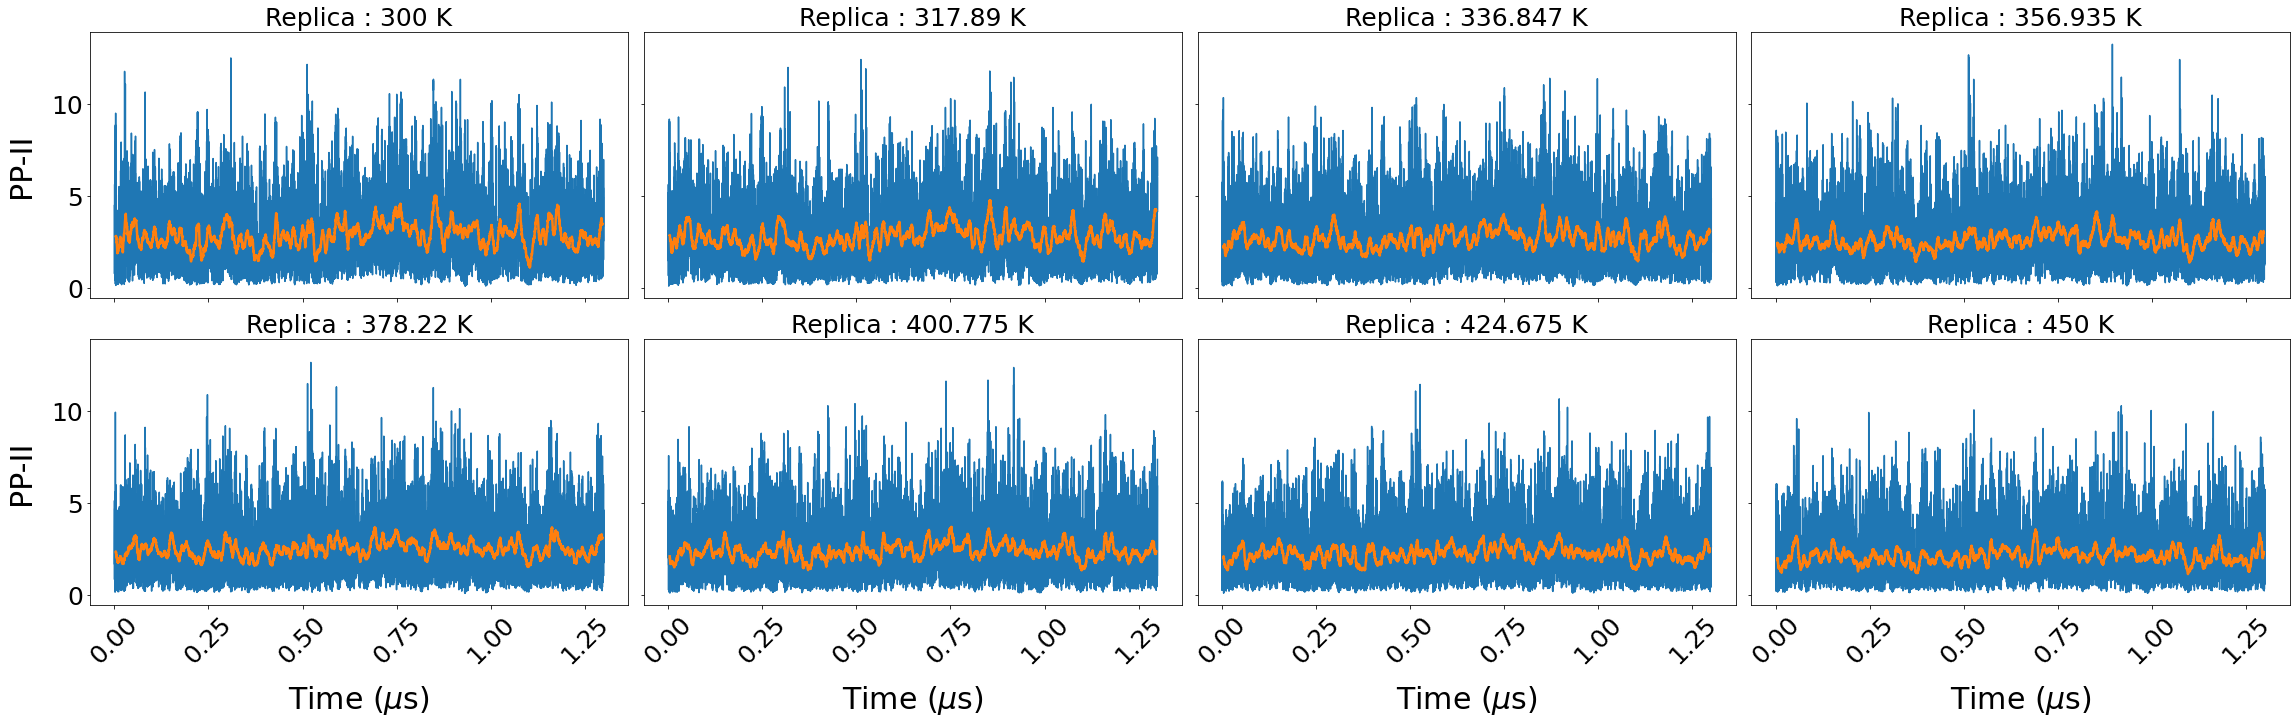

In [39]:
fig, ax = plt.subplots(2, 4, figsize=(32, 10), sharex=True, sharey=True)

i='rep'
N=100

for val in range(nrep):
    p, q = np.unravel_index(val,(2, 4))
    
    X=np.sum(np.array(pp[i])[val],axis=0)
    
    ax[p,q].plot(time,X)
    ax[p,q].plot(np.convolve(time, np.ones(N)/N, mode='valid'),
                 np.convolve(X, np.ones(N)/N, mode='valid'),linewidth=2.5)
    
    ax[p,q].tick_params(labelsize=25)
    plt.setp(ax[p,q].get_xticklabels(), rotation=45)
    #ax[p,q].set_ylim(0.6,2.0)
    #ax[p,q].set_xticks(range(0,142,2))
    #ax[p,q].set_yticks(np.arange(0.6,2.2,0.4))
    
    ax[p,q].set_title('Replica : '+temperature[val]+' K',size=25)

    if not q : ax[p,q].set_ylabel("PP-II", size=30, labelpad=15)
    if p == 2-1 : ax[p,q].set_xlabel('Time ($\mu$s)', size=30, labelpad=15)
        
plt.tight_layout()

plt.savefig(data_dir+'pp_rep.png',dpi=210)

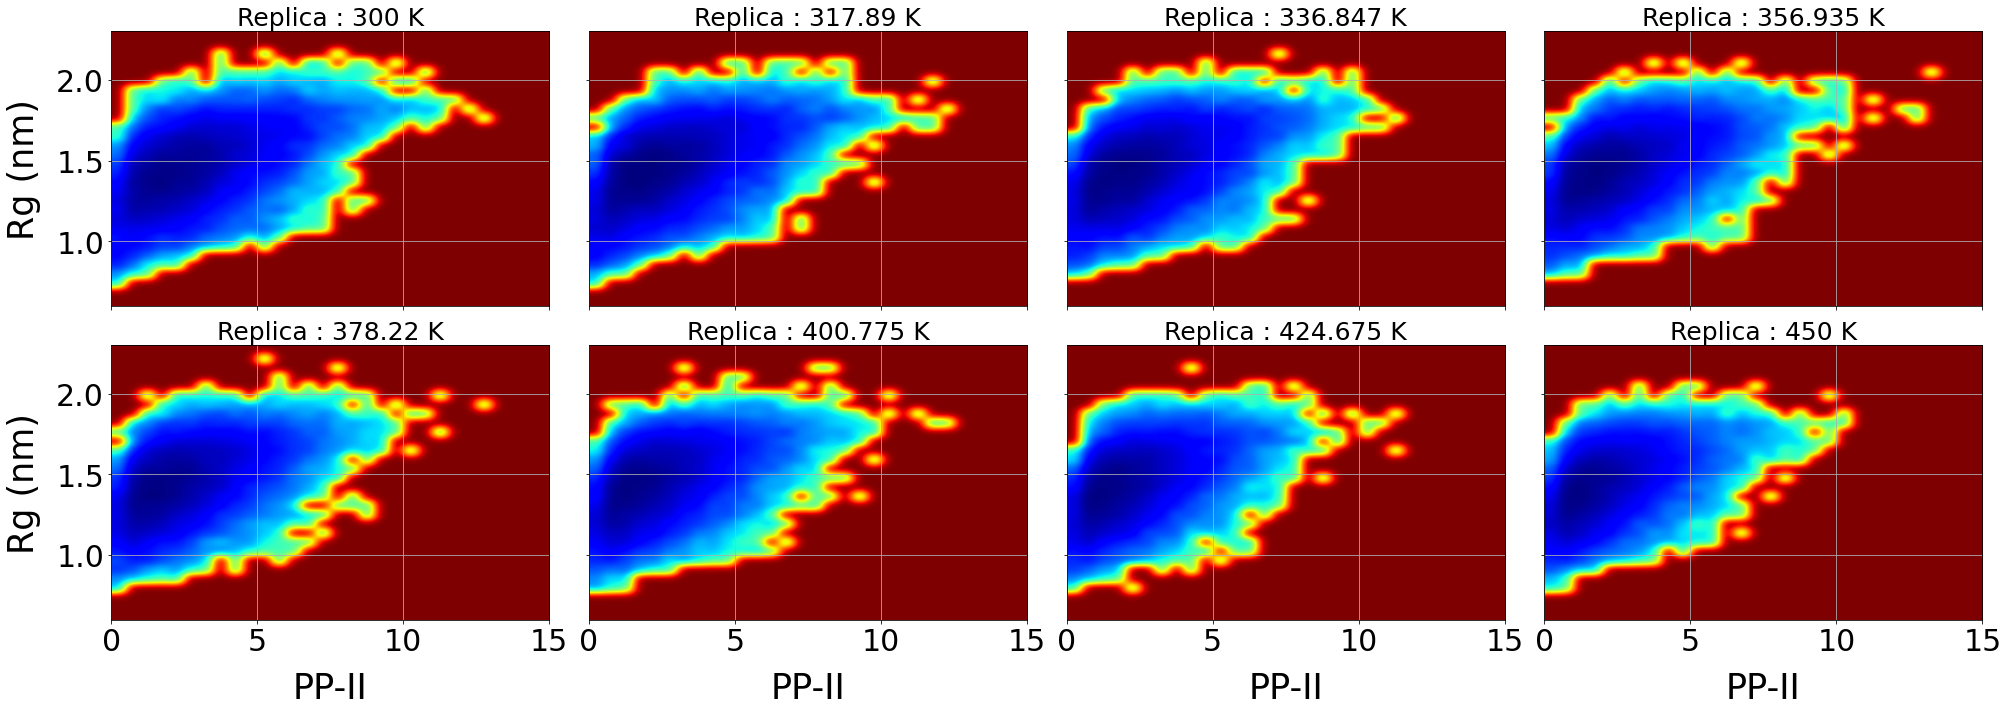

In [42]:
fig, ax = plt.subplots(2, 4, figsize=(28, 10), sharex=True, sharey=True)

i='rep'

#cbar_ax = fig.add_axes([.91, .3, .03, .4])

for val in range(nrep):
    p, q = np.unravel_index(val,(2, 4))
    
    X=np.sum(np.array(pp[i])[val],axis=0)
    
    a, xedges, yedges = np.histogram2d(np.array(rg[i])[val], X, 30, [[0.6, 2.3], [0, 15.0]],
                                       normed=True, weights=None)
    
    a = np.log(np.flipud(a)+.000001)
    T = 300
    a = -(0.001987*T)*a
    

    im=subplot_imshow(a, xedges, yedges, ax=ax[p,q])
    
    
    cbar_ticks = [0, 1, 2, 3, 4, 5]
    
    imaxes = plt.gca()
    
    ax[p,q].tick_params(labelsize=30)
    #plt.setp(ax[p,q].get_xticklabels())
    ax[p,q].grid()
    #ax[p,q].set_ylim(0.6,2.0)
    #ax[p,q].set_xticks(range(0,142,2))
    #ax[p,q].set_yticks(np.arange(0.6,2.2,0.4))
    
    ax[p,q].set_title('Replica : '+temperature[val]+' K',size=25)

    if not q : ax[p,q].set_ylabel('Rg (nm)', size=35, labelpad=15)
    if p == 2-1 : ax[p,q].set_xlabel('PP-II', size=35, labelpad=15)
        
plt.tight_layout()

plt.savefig(data_dir+'pp_rg_rep.png',dpi=210)
#plt.show()

In [43]:
aa=json.load(open(data_dir+'average_angle.json','r'))

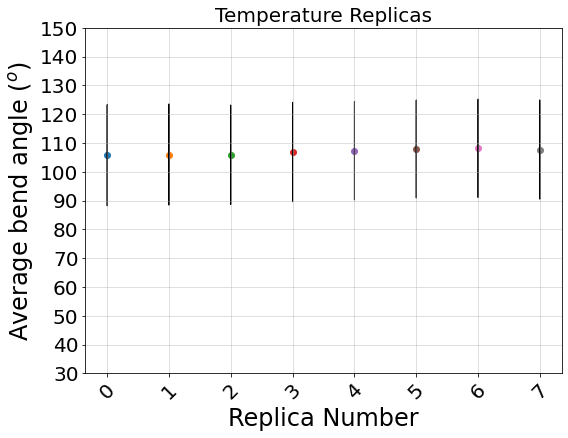

<Figure size 432x288 with 0 Axes>

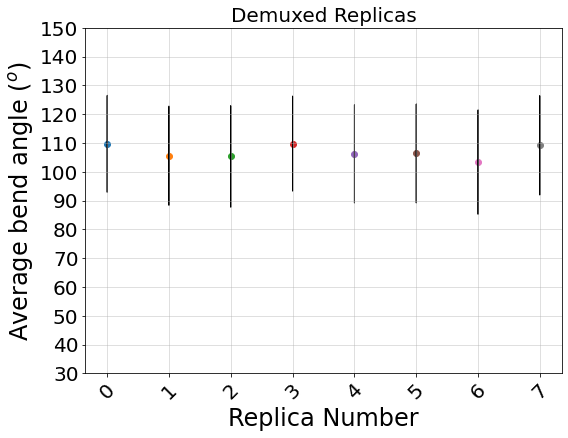

<Figure size 432x288 with 0 Axes>

In [44]:
for j in ['rep','demux']:

    plt.figure(figsize=(8,6))
    for i in range(nrep):

        plt.scatter(np.array(aa[j]).T[0][i],np.array(aa[j]).T[1][i])
        plt.arrow(np.array(aa[j]).T[0][i],
                  (np.array(aa[j]).T[1][i]-(np.array(aa[j]).T[2][i]/2)),0,np.array(aa[j]).T[2][i])

    plt.xticks(range(0,nrep),size=20,rotation=45)
    plt.yticks(range(30,160,10),size=20)

    plt.xlabel("Replica Number",size=24)
    plt.ylabel("Average bend angle ($^{o}$)", size=24)
    plt.grid(alpha=0.5)
    plt.tight_layout()
    
    if j=='rep' : plt.title('Temperature Replicas', size=20)
    else : plt.title('Demuxed Replicas', size=20)
    
    
    out_name='Average_angle_'+str(j)+'.png'
    plt.savefig(data_dir+out_name,dpi=210)
    
    plt.show()
    plt.clf()

In [45]:
charge=json.load(open(data_dir+'charge_prob.json','r'))
hphob=json.load(open(data_dir+'hyphob_prob.json','r'))
aro=json.load(open(data_dir+'aro_prob.json','r'))
hbond=json.load(open(data_dir+'hbond_prob.json','r'))
contact=json.load(open(data_dir+'contact_prob.json','r'))

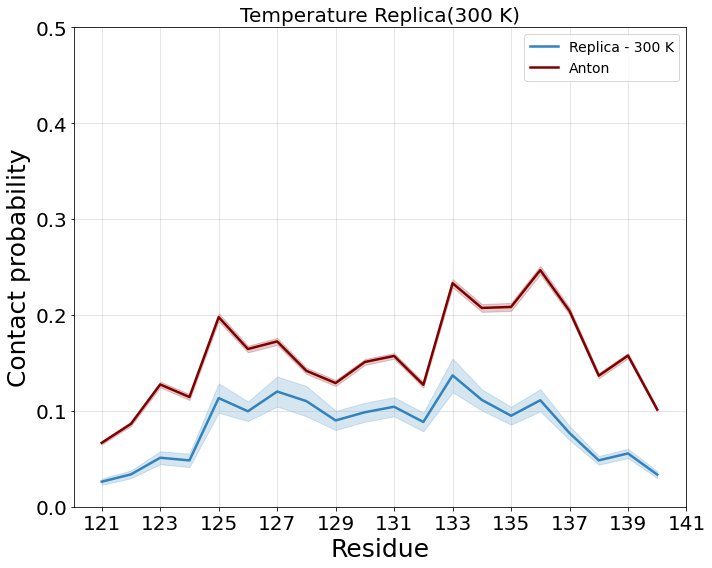

<Figure size 432x288 with 0 Axes>

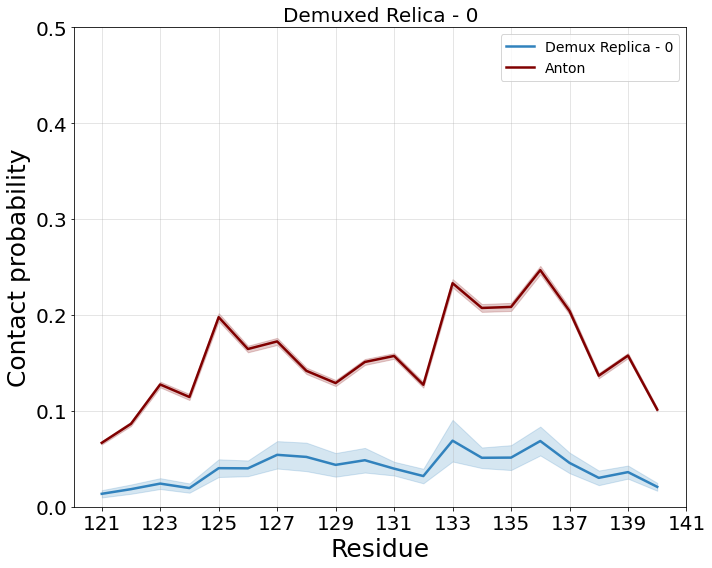

<Figure size 432x288 with 0 Axes>

In [46]:
rep_list=[0]

s=['rep','demux']

for i in s :
    
    plt.figure(figsize=(10,8))
    
    for val in rep_list:    

        if i=='rep': 
            label_="Replica - "+str(temperature[val])+' K'  
            title_='Temperature Replica'+'('+str(temperature[val])+' K)'
        else:
            label_="Demux Replica - "+str(val)
            title_="Demuxed Relica - "+str(val)

        plt.plot(np.array(contact[i][val]).T[0], np.array(contact[i][val]).T[1], linewidth=2.5,
                 c=plt.cm.tab20c(val),label=label_)

        plt.fill_between(np.array(contact[i][val]).T[0], np.array(contact[i][val]).T[1]-np.array(contact[i][val]).T[2],
                         np.array(contact[i][val]).T[1]+np.array(contact[i][val]).T[2], alpha=0.2,color=plt.cm.tab20c(val))


    plt.plot(contact_a.T[0], contact_a.T[1], linewidth=2.5, c='maroon',label='Anton')
    plt.fill_between(contact_a.T[0], contact_a.T[1]-contact_a.T[2]
                     ,contact_a.T[1]+contact_a.T[2], alpha=0.2,color='maroon')

    plt.title(title_,size=20)
    plt.xlabel('Residue', size=25)
    plt.ylabel('Contact probability', size=25)
    plt.tick_params(labelsize=20)
    plt.xticks(range(121,142,2))
    plt.ylim(0,0.5)
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
    plt.legend(fontsize=14)

    plt.grid(alpha=0.4)
    plt.tight_layout()
    out_name='contact_prob_'+str(i)+'_'+'0.png'
    plt.savefig(data_dir+out_name,dpi=210)
    
    plt.show()
    
    plt.clf()



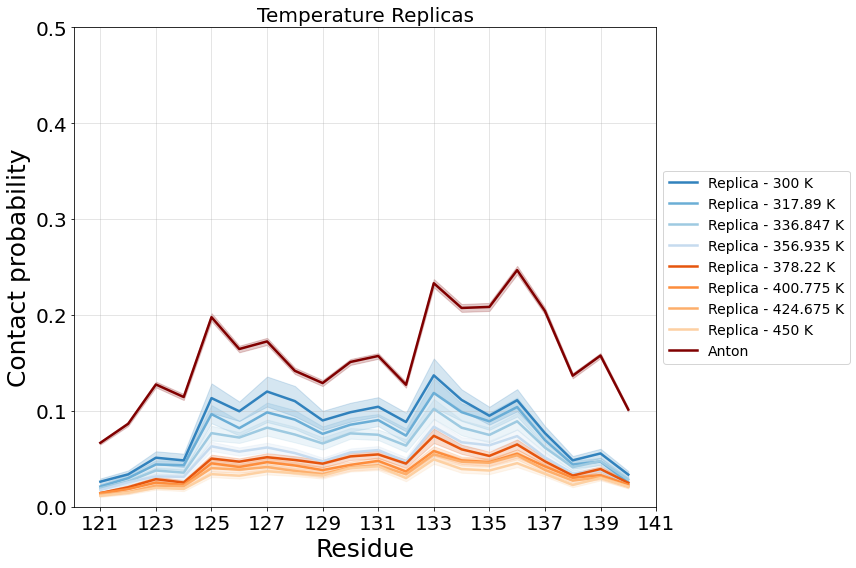

<Figure size 432x288 with 0 Axes>

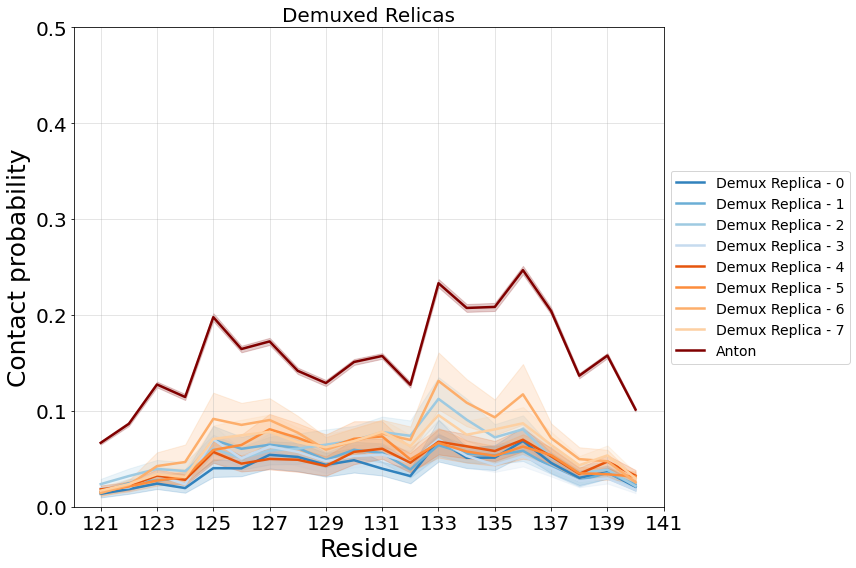

<Figure size 432x288 with 0 Axes>

In [47]:
rep_list=[i for i in range(nrep)]

s=['rep','demux']

for i in s :
    
    plt.figure(figsize=(12,8))
    
    for val in rep_list:    

        if i=='rep': 
            label_="Replica - "+str(temperature[val])+' K'  
            title_='Temperature Replicas'
        else:
            label_="Demux Replica - "+str(val)
            title_="Demuxed Relicas"

        plt.plot(np.array(contact[i][val]).T[0], np.array(contact[i][val]).T[1], linewidth=2.5,
                 c=plt.cm.tab20c(val),label=label_)

        plt.fill_between(np.array(contact[i][val]).T[0], np.array(contact[i][val]).T[1]-np.array(contact[i][val]).T[2],
                         np.array(contact[i][val]).T[1]+np.array(contact[i][val]).T[2], alpha=0.2,color=plt.cm.tab20c(val))


    plt.plot(contact_a.T[0], contact_a.T[1], linewidth=2.5, c='maroon',label='Anton')
    plt.fill_between(contact_a.T[0], contact_a.T[1]-contact_a.T[2]
                     ,contact_a.T[1]+contact_a.T[2], alpha=0.2,color='maroon')

    plt.title(title_,size=20)
    plt.xlabel('Residue', size=25)
    plt.ylabel('Contact probability', size=25)
    plt.tick_params(labelsize=20)
    plt.xticks(range(121,142,2))
    plt.ylim(0,0.5)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
    #plt.legend(fontsize=14)

    plt.grid(alpha=0.4)
    plt.tight_layout()
    out_name='contact_prob_'+str(i)+'.png'
    plt.savefig(data_dir+out_name,dpi=210)
    plt.show()
    
    plt.clf()



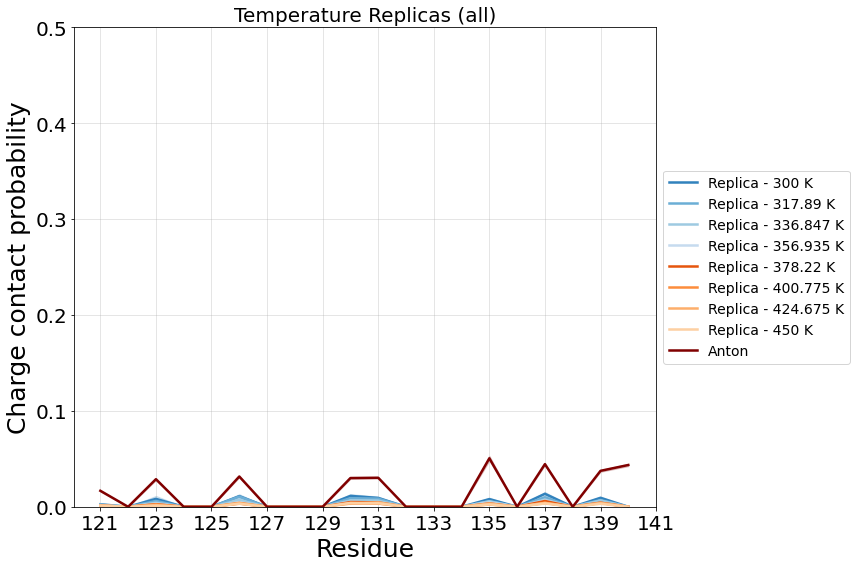

<Figure size 432x288 with 0 Axes>

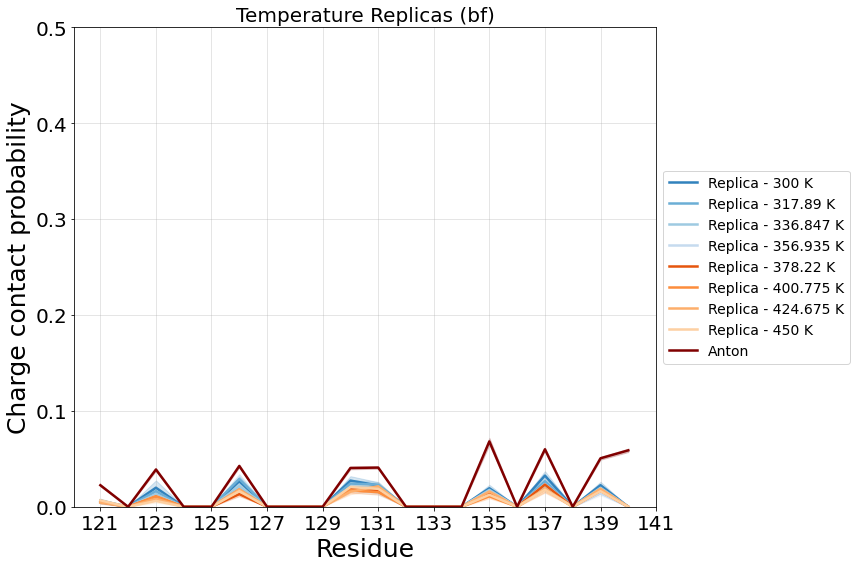

<Figure size 432x288 with 0 Axes>

In [48]:
rep_list=[i for i in range(nrep)]

s=['rep']

for i in s :
    
    for j in ['all','bf']:
        

        plt.figure(figsize=(12,8))
        
        for val in rep_list:    

            if i=='rep': 
                label_="Replica - "+str(temperature[val])+' K'  
                title_='Temperature Replicas'+' ('+str(j)+')'
            else:
                label_="Demux Replica - "+str(val)
                title_="Demuxed Relicas"+' ('+str(j)+')'
            

            plt.plot(np.array(charge[i][j][val]).T[0], np.array(charge[i][j][val]).T[1], linewidth=2.5,
                     c=plt.cm.tab20c(val),label=label_)

            plt.fill_between(np.array(charge[i][j][val]).T[0], np.array(charge[i][j][val]).T[1]-np.array(charge[i][j][val]).T[2],
                             np.array(charge[i][j][val]).T[1]+np.array(charge[i][j][val]).T[2], alpha=0.2,color=plt.cm.tab20c(val))
    
    
        plt.plot(charge_a[j].T[0][:20:], charge_a[j].T[1][:20:], linewidth=2.5, c='maroon',label='Anton')
        plt.fill_between(charge_a[j].T[0][:20:], charge_a[j].T[1][:20:]-charge_a[j].T[2][:20:]
                         ,charge_a[j].T[1][:20:]+charge_a[j].T[2][:20:], alpha=0.2,color='maroon')

        plt.title(title_,size=20)
        plt.xlabel('Residue', size=25)
        plt.ylabel('Charge contact probability', size=25)
        plt.tick_params(labelsize=20)
        plt.xticks(range(121,142,2))
        plt.ylim(0,0.5)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
        #plt.legend(fontsize=14)

        plt.grid(alpha=0.4)
        plt.tight_layout()
        out_name='charge_prob_'+str(i)+'_'+str(j)+'.png'
        
        plt.savefig(data_dir+out_name,dpi=210)
        plt.show()
        
        plt.clf()

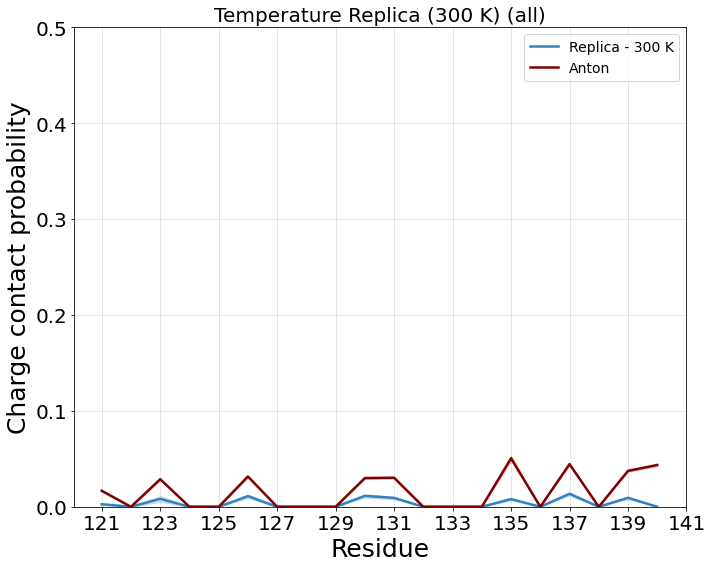

<Figure size 432x288 with 0 Axes>

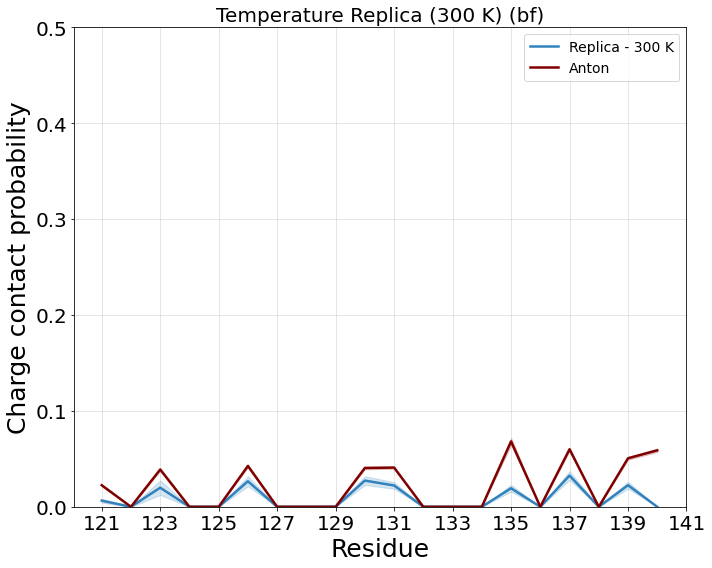

<Figure size 432x288 with 0 Axes>

In [49]:
rep_list=[0]

s=['rep']

for i in s :
    
    for j in ['all','bf']:
        

        plt.figure(figsize=(10,8))
        
        for val in rep_list:    

            if i=='rep': 
                label_="Replica - "+str(temperature[val])+' K'  
                title_='Temperature Replica '+'('+str(temperature[val])+' K)'+' ('+str(j)+')'
            else:
                label_="Demux Replica - "+str(val)
                title_="Demuxed Relica "+str(val)+' ('+str(j)+')'
            

            plt.plot(np.array(charge[i][j][val]).T[0], np.array(charge[i][j][val]).T[1], linewidth=2.5,
                     c=plt.cm.tab20c(val),label=label_)

            plt.fill_between(np.array(charge[i][j][val]).T[0], np.array(charge[i][j][val]).T[1]-np.array(charge[i][j][val]).T[2],
                             np.array(charge[i][j][val]).T[1]+np.array(charge[i][j][val]).T[2], alpha=0.2,color=plt.cm.tab20c(val))
    
    
        plt.plot(charge_a[j].T[0][:20:], charge_a[j].T[1][:20:], linewidth=2.5, c='maroon',label='Anton')
        plt.fill_between(charge_a[j].T[0][:20:], charge_a[j].T[1][:20:]-charge_a[j].T[2][:20:]
                         ,charge_a[j].T[1][:20:]+charge_a[j].T[2][:20:], alpha=0.2,color='maroon')

        plt.title(title_,size=20)
        plt.xlabel('Residue', size=25)
        plt.ylabel('Charge contact probability', size=25)
        plt.tick_params(labelsize=20)
        plt.xticks(range(121,142,2))
        plt.ylim(0,0.5)
        #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
        plt.legend(fontsize=14)

        plt.grid(alpha=0.4)
        plt.tight_layout()
        out_name='charge_prob_'+str(i)+'_'+str(j)+'_0'+'.png'
        
        plt.savefig(data_dir+out_name,dpi=210)
        plt.show()
        
        plt.clf()

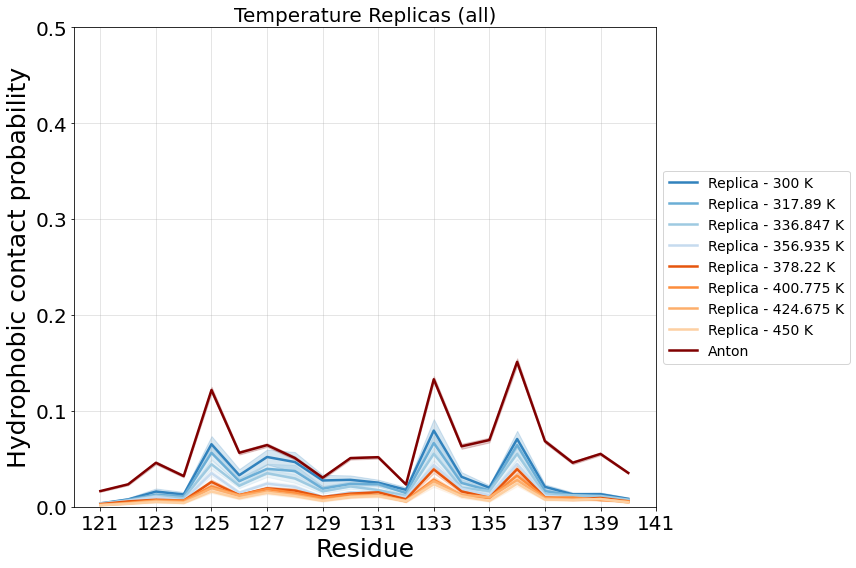

<Figure size 432x288 with 0 Axes>

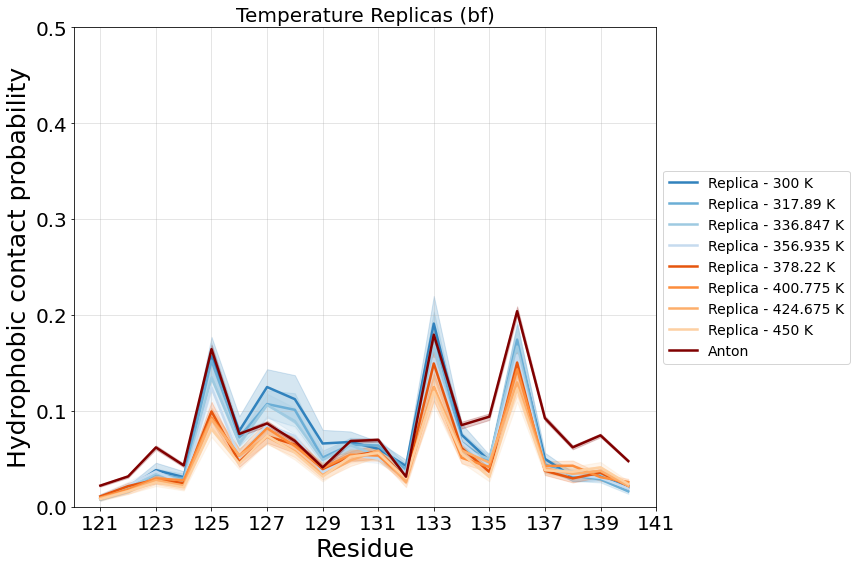

<Figure size 432x288 with 0 Axes>

In [50]:
rep_list=[i for i in range(nrep)]

s=['rep']

for i in s :
    
    for j in ['all','bf']:
        

        plt.figure(figsize=(12,8))
        
        for val in rep_list:    

            if i=='rep': 
                label_="Replica - "+str(temperature[val])+' K'  
                title_='Temperature Replicas'+' ('+str(j)+')'
            else:
                label_="Demux Replica - "+str(val)
                title_="Demuxed Relicas"+' ('+str(j)+')'
            
                
            plt.plot(np.array(hphob[i][j][val]).T[0], np.array(hphob[i][j][val]).T[1], linewidth=2.5,
                     c=plt.cm.tab20c(val),label=label_)

            plt.fill_between(np.array(hphob[i][j][val]).T[0], np.array(hphob[i][j][val]).T[1]-np.array(hphob[i][j][val]).T[2],
                             np.array(hphob[i][j][val]).T[1]+np.array(hphob[i][j][val]).T[2], alpha=0.2,color=plt.cm.tab20c(val))
                
    
    
        plt.plot(hphob_a[j].T[0][:20:], hphob_a[j].T[1][:20:], linewidth=2.5, c='maroon',label='Anton')
        plt.fill_between(hphob_a[j].T[0][:20:], hphob_a[j].T[1][:20:]-hphob_a[j].T[2][:20:]
                         ,hphob_a[j].T[1][:20:]+hphob_a[j].T[2][:20:], alpha=0.2,color='maroon')

        plt.title(title_,size=20)
        plt.xlabel('Residue', size=25)
        plt.ylabel('Hydrophobic contact probability', size=25)
        plt.tick_params(labelsize=20)
        plt.xticks(range(121,142,2))
        plt.ylim(0,0.5)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
        #plt.legend(fontsize=14)

        plt.grid(alpha=0.4)
        plt.tight_layout()
        out_name='hphob_prob_'+str(i)+'_'+str(j)+'.png'
        
        plt.savefig(data_dir+out_name,dpi=210)
        plt.show()
        
        plt.clf()

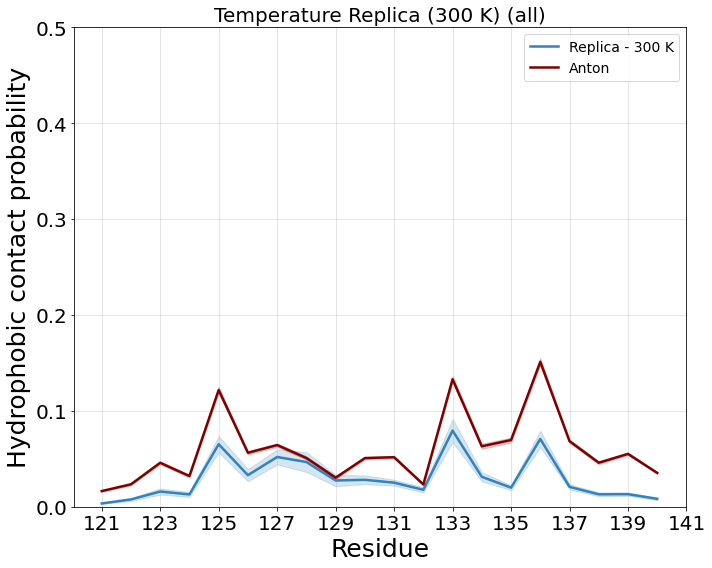

<Figure size 432x288 with 0 Axes>

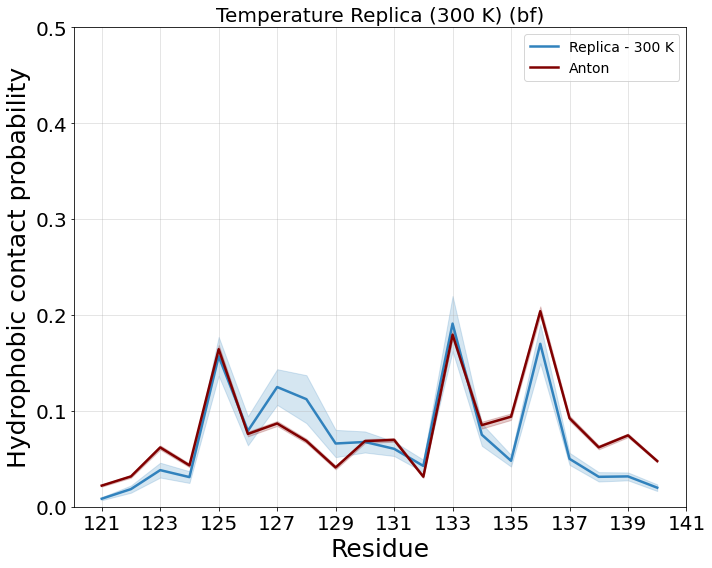

<Figure size 432x288 with 0 Axes>

In [51]:
rep_list=[0]

s=['rep']

for i in s :
    
    for j in ['all','bf']:
        

        plt.figure(figsize=(10,8))
        
        for val in rep_list:    

            if i=='rep': 
                label_="Replica - "+str(temperature[val])+' K'  
                title_='Temperature Replica '+'('+str(temperature[val])+' K)'+' ('+str(j)+')'
            else:
                label_="Demux Replica - "+str(val)
                title_="Demuxed Relica "+str(val)+' ('+str(j)+')'
            

            plt.plot(np.array(hphob[i][j][val]).T[0], np.array(hphob[i][j][val]).T[1], linewidth=2.5,
                     c=plt.cm.tab20c(val),label=label_)

            plt.fill_between(np.array(hphob[i][j][val]).T[0], np.array(hphob[i][j][val]).T[1]-np.array(hphob[i][j][val]).T[2],
                             np.array(hphob[i][j][val]).T[1]+np.array(hphob[i][j][val]).T[2], alpha=0.2,color=plt.cm.tab20c(val))
    
    
        plt.plot(hphob_a[j].T[0][:20:], hphob_a[j].T[1][:20:], linewidth=2.5, c='maroon',label='Anton')
        plt.fill_between(hphob_a[j].T[0][:20:], hphob_a[j].T[1][:20:]-hphob_a[j].T[2][:20:]
                         ,hphob_a[j].T[1][:20:]+hphob_a[j].T[2][:20:], alpha=0.2,color='maroon')

        plt.title(title_,size=20)
        plt.xlabel('Residue', size=25)
        plt.ylabel('Hydrophobic contact probability', size=25)
        plt.tick_params(labelsize=20)
        plt.xticks(range(121,142,2))
        plt.ylim(0,0.5)
        #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
        plt.legend(fontsize=14)

        plt.grid(alpha=0.4)
        plt.tight_layout()
        out_name='hphob_prob_'+str(i)+'_'+str(j)+'_0'+'.png'
        
        plt.savefig(data_dir+out_name,dpi=210)
        plt.show()
        
        plt.clf()

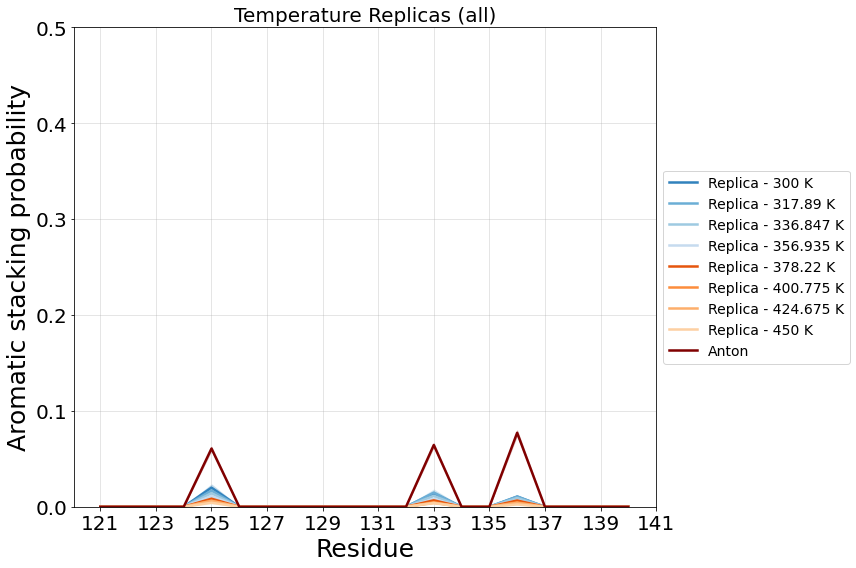

<Figure size 432x288 with 0 Axes>

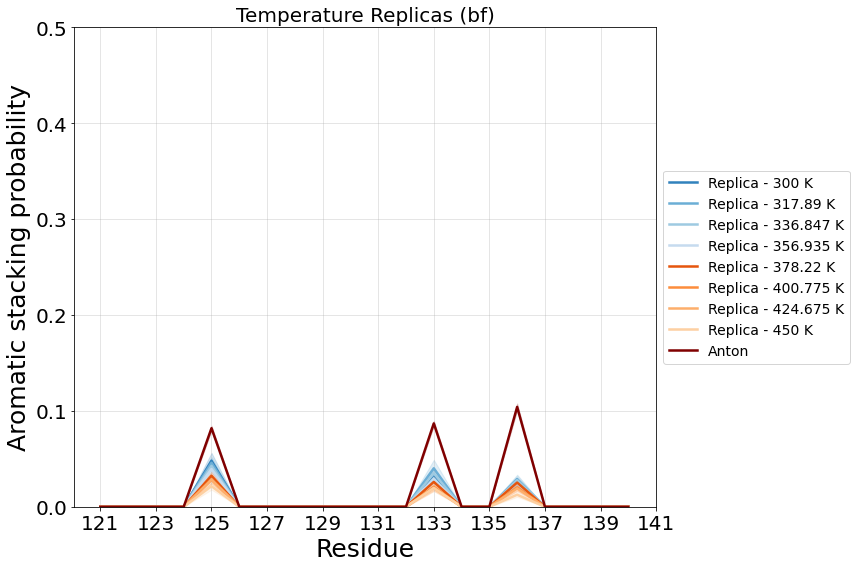

<Figure size 432x288 with 0 Axes>

In [52]:
rep_list=[i for i in range(nrep)]

s=['rep']

for i in s :
    
    for j in ['all','bf']:
        

        plt.figure(figsize=(12,8))
        
        for val in rep_list:    

            if i=='rep': 
                label_="Replica - "+str(temperature[val])+' K'  
                title_='Temperature Replicas'+' ('+str(j)+')'
            else:
                label_="Demux Replica - "+str(val)
                title_="Demuxed Relicas"+' ('+str(j)+')'
            

            if j=='all':
                
                plt.plot(np.array(aro[i][j][val]).T[0], np.array(aro[i][j][val]).T[1], linewidth=2.5,
                         c=plt.cm.tab20c(val),label=label_)

                plt.fill_between(np.array(aro[i][j][val]).T[0], np.array(aro[i][j][val]).T[1]-np.array(aro[i][j][val]).T[2],
                                 np.array(aro[i][j][val]).T[1]+np.array(aro[i][j][val]).T[2], alpha=0.2,color=plt.cm.tab20c(val))
            else:
                
                plt.plot(np.array(aro[i][j][val]).T[0][:20:], np.array(aro[i][j][val]).T[1][:20:], linewidth=2.5,
                         c=plt.cm.tab20c(val),label=label_)

                plt.fill_between(np.array(aro[i][j][val]).T[0][:20:], np.array(aro[i][j][val]).T[1][:20:]-np.array(aro[i][j][val]).T[2][:20:],
                                 np.array(aro[i][j][val]).T[1][:20:]+np.array(aro[i][j][val]).T[2][:20:], alpha=0.2,color=plt.cm.tab20c(val))
    
    
        plt.plot(aro_a[j].T[0][:20:], aro_a[j].T[1][:20:], linewidth=2.5, c='maroon',label='Anton')
        plt.fill_between(aro_a[j].T[0][:20:], aro_a[j].T[1][:20:]-aro_a[j].T[2][:20:]
                         ,aro_a[j].T[1][:20:]+aro_a[j].T[2][:20:], alpha=0.2,color='maroon')

        plt.title(title_,size=20)
        plt.xlabel('Residue', size=25)
        plt.ylabel('Aromatic stacking probability', size=25)
        plt.tick_params(labelsize=20)
        plt.xticks(range(121,142,2))
        plt.ylim(0,0.5)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
        #plt.legend(fontsize=14)

        plt.grid(alpha=0.4)
        plt.tight_layout()
        out_name='aro_prob_'+str(i)+'_'+str(j)+'.png'
        
        plt.savefig(data_dir+out_name,dpi=210)
        plt.show()
        
        plt.clf()

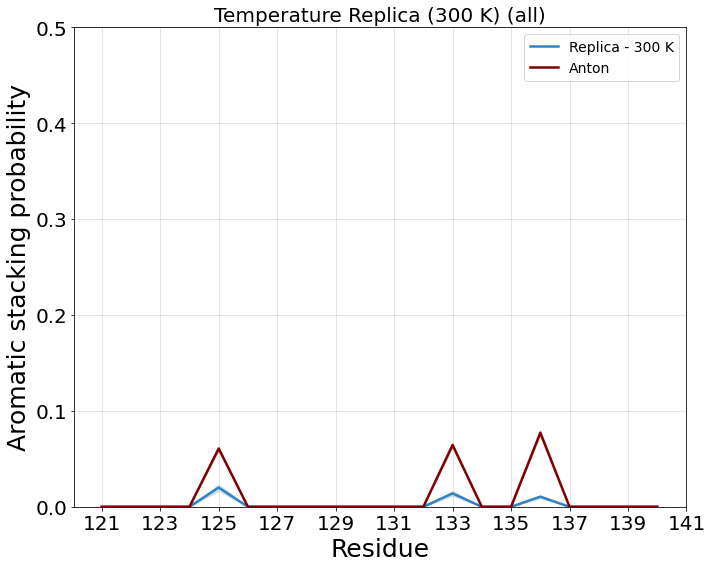

<Figure size 432x288 with 0 Axes>

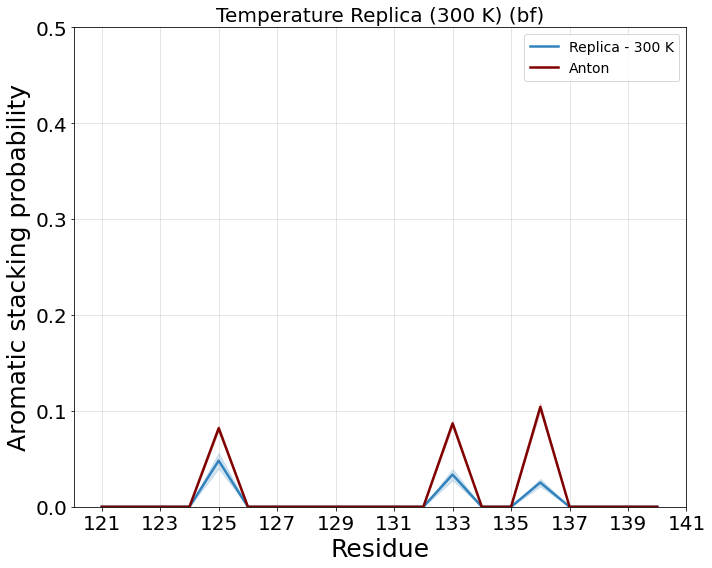

<Figure size 432x288 with 0 Axes>

In [53]:
rep_list=[0]

s=['rep']

for i in s :
    
    for j in ['all','bf']:
        

        plt.figure(figsize=(10,8))
        
        for val in rep_list:    

            if i=='rep': 
                label_="Replica - "+str(temperature[val])+' K'  
                title_='Temperature Replica '+'('+str(temperature[val])+' K)'+' ('+str(j)+')'
            else:
                label_="Demux Replica - "+str(val)
                title_="Demuxed Relica "+str(val)+' ('+str(j)+')'
            

            plt.plot(np.array(aro[i][j][val]).T[0], np.array(aro[i][j][val]).T[1], linewidth=2.5,
                     c=plt.cm.tab20c(val),label=label_)

            plt.fill_between(np.array(aro[i][j][val]).T[0], np.array(aro[i][j][val]).T[1]-np.array(aro[i][j][val]).T[2],
                             np.array(aro[i][j][val]).T[1]+np.array(aro[i][j][val]).T[2], alpha=0.2,color=plt.cm.tab20c(val))
    
    
        plt.plot(aro_a[j].T[0][:20:], aro_a[j].T[1][:20:], linewidth=2.5, c='maroon',label='Anton')
        plt.fill_between(aro_a[j].T[0][:20:], aro_a[j].T[1][:20:]-aro_a[j].T[2][:20:]
                         ,aro_a[j].T[1][:20:]+aro_a[j].T[2][:20:], alpha=0.2,color='maroon')

        plt.title(title_,size=20)
        plt.xlabel('Residue', size=25)
        plt.ylabel('Aromatic stacking probability', size=25)
        plt.tick_params(labelsize=20)
        plt.xticks(range(121,142,2))
        plt.ylim(0,0.5)
        #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
        plt.legend(fontsize=14)

        plt.grid(alpha=0.4)
        plt.tight_layout()
        out_name='aro_prob_'+str(i)+'_'+str(j)+'_0'+'.png'
        
        plt.savefig(data_dir+out_name,dpi=210)
        plt.show()
        
        plt.clf()

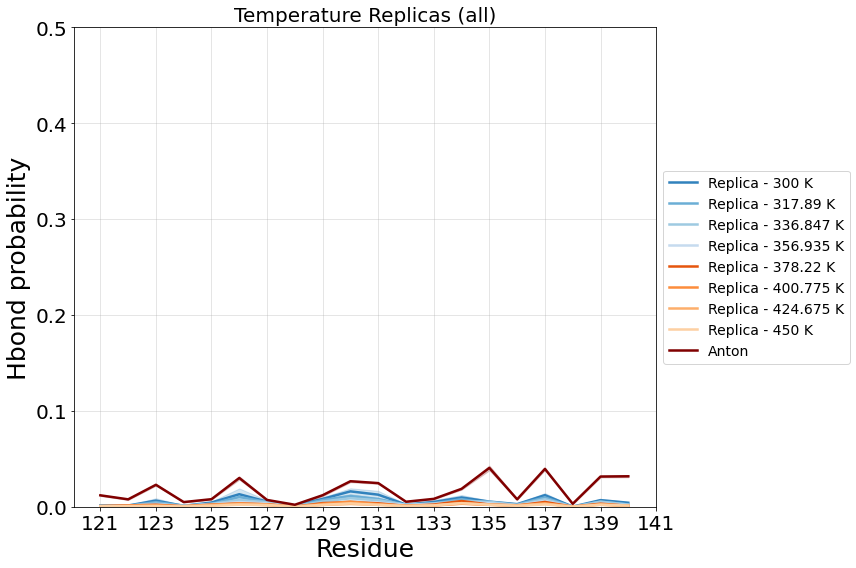

<Figure size 432x288 with 0 Axes>

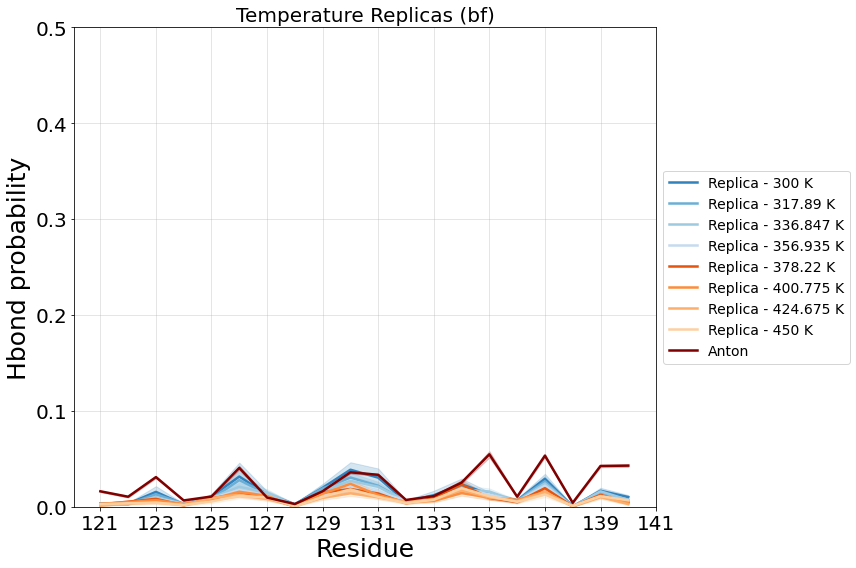

<Figure size 432x288 with 0 Axes>

In [54]:
rep_list=[i for i in range(nrep)]

s=['rep']

for i in s :
    
    for j in ['all','bf']:
        

        plt.figure(figsize=(12,8))
        
        for val in rep_list:    

            if i=='rep': 
                label_="Replica - "+str(temperature[val])+' K'  
                title_='Temperature Replicas'+' ('+str(j)+')'
            else:
                label_="Demux Replica - "+str(val)
                title_="Demuxed Relicas"+' ('+str(j)+')'
            

                
            plt.plot(np.array(hbond[i][j][val]).T[0], np.array(hbond[i][j][val]).T[1], linewidth=2.5,
                         c=plt.cm.tab20c(val),label=label_)

            plt.fill_between(np.array(hbond[i][j][val]).T[0], np.array(hbond[i][j][val]).T[1]-np.array(hbond[i][j][val]).T[2],
                             np.array(hbond[i][j][val]).T[1]+np.array(hbond[i][j][val]).T[2], alpha=0.2,color=plt.cm.tab20c(val))
            
    
    
        plt.plot(hbond_a[j].T[0][:20:], hbond_a[j].T[1][:20:], linewidth=2.5, c='maroon',label='Anton')
        plt.fill_between(hbond_a[j].T[0][:20:], hbond_a[j].T[1][:20:]-hbond_a[j].T[2][:20:]
                         ,hbond_a[j].T[1][:20:]+hbond_a[j].T[2][:20:], alpha=0.2,color='maroon')

        plt.title(title_,size=20)
        plt.xlabel('Residue', size=25)
        plt.ylabel('Hbond probability', size=25)
        plt.tick_params(labelsize=20)
        plt.xticks(range(121,142,2))
        plt.ylim(0,0.5)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
        #plt.legend(fontsize=14)

        plt.grid(alpha=0.4)
        plt.tight_layout()
        out_name='hbond_prob_'+str(i)+'_'+str(j)+'.png'
        
        plt.savefig(data_dir+out_name,dpi=210)
        plt.show()
        
        plt.clf()

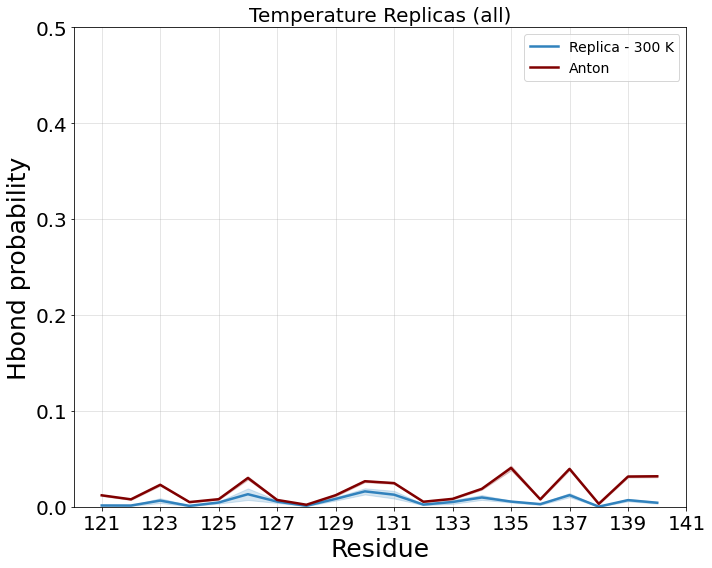

<Figure size 432x288 with 0 Axes>

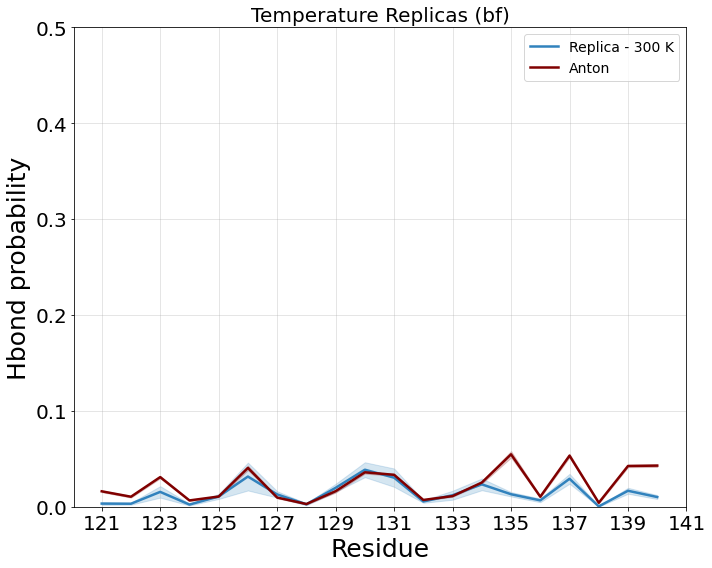

<Figure size 432x288 with 0 Axes>

In [55]:
rep_list=[0]

s=['rep']

for i in s :
    
    for j in ['all','bf']:
        

        plt.figure(figsize=(10,8))
        
        for val in rep_list:    

            if i=='rep': 
                label_="Replica - "+str(temperature[val])+' K'  
                title_='Temperature Replicas'+' ('+str(j)+')'
            else:
                label_="Demux Replica - "+str(val)
                title_="Demuxed Relicas"+' ('+str(j)+')'
            

                
            plt.plot(np.array(hbond[i][j][val]).T[0], np.array(hbond[i][j][val]).T[1], linewidth=2.5,
                         c=plt.cm.tab20c(val),label=label_)

            plt.fill_between(np.array(hbond[i][j][val]).T[0], np.array(hbond[i][j][val]).T[1]-np.array(hbond[i][j][val]).T[2],
                             np.array(hbond[i][j][val]).T[1]+np.array(hbond[i][j][val]).T[2], alpha=0.2,color=plt.cm.tab20c(val))
            
    
    
        plt.plot(hbond_a[j].T[0][:20:], hbond_a[j].T[1][:20:], linewidth=2.5, c='maroon',label='Anton')
        plt.fill_between(hbond_a[j].T[0][:20:], hbond_a[j].T[1][:20:]-hbond_a[j].T[2][:20:]
                         ,hbond_a[j].T[1][:20:]+hbond_a[j].T[2][:20:], alpha=0.2,color='maroon')

        plt.title(title_,size=20)
        plt.xlabel('Residue', size=25)
        plt.ylabel('Hbond probability', size=25)
        plt.tick_params(labelsize=20)
        plt.xticks(range(121,142,2))
        plt.ylim(0,0.5)
        #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
        plt.legend(fontsize=14)

        plt.grid(alpha=0.4)
        plt.tight_layout()
        out_name='hbond_prob_'+str(i)+'_'+str(j)+'_0'+'.png'
        
        plt.savefig(data_dir+out_name,dpi=210)
        plt.show()
        
        plt.clf()

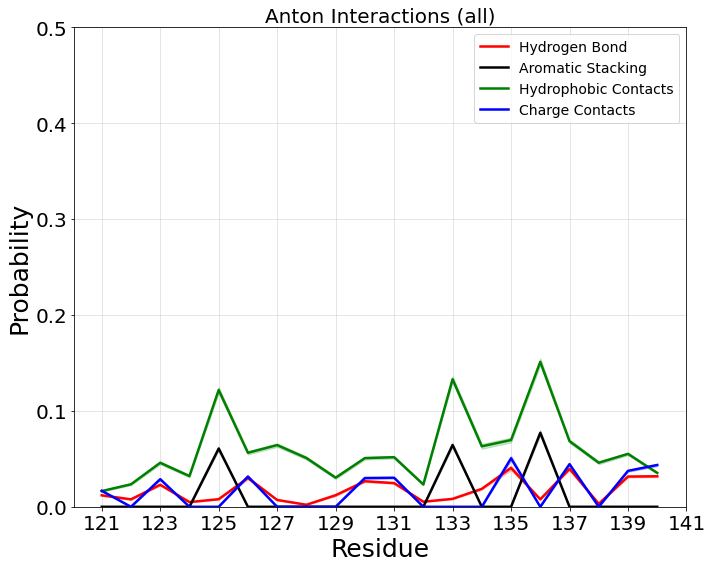

<Figure size 432x288 with 0 Axes>

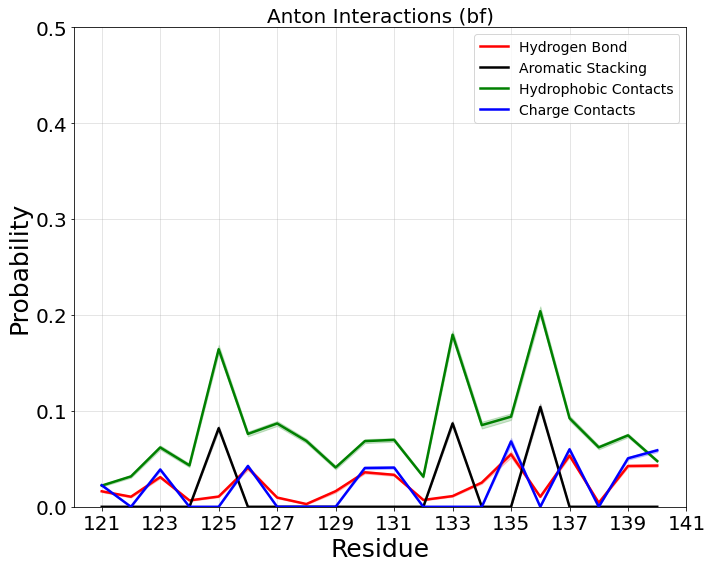

<Figure size 432x288 with 0 Axes>

In [56]:
for j in ['all','bf']:

    plt.figure(figsize=(10,8))

    plt.plot(hbond_a[j].T[0][:20:], hbond_a[j].T[1][:20:], linewidth=2.5, label='Hydrogen Bond', color='red')
    plt.fill_between(hbond_a[j].T[0][:20:], hbond_a[j].T[1][:20:]-hbond_a[j].T[2][:20:]
                     ,hbond_a[j].T[1][:20:]+hbond_a[j].T[2][:20:], alpha=0.2,color='r')

    plt.plot(aro_a[j].T[0][:20:], aro_a[j].T[1][:20:], linewidth=2.5, color='black', label='Aromatic Stacking')
    plt.fill_between(aro_a[j].T[0][:20:], aro_a[j].T[1][:20:]-aro_a[j].T[2][:20:]
                     ,aro_a[j].T[1][:20:]+aro_a[j].T[2][:20:], alpha=0.2,color='black')

    plt.plot(hphob_a[j].T[0][:20:], hphob_a[j].T[1][:20:], linewidth=2.5, label='Hydrophobic Contacts', color='green')
    plt.fill_between(hphob_a[j].T[0][:20:], hphob_a[j].T[1][:20:]-hphob_a[j].T[2][:20:]
                     ,hphob_a[j].T[1][:20:]+hphob_a[j].T[2][:20:], alpha=0.2,color='green')

    plt.plot(charge_a[j].T[0][:20:], charge_a[j].T[1][:20:], linewidth=2.5, label='Charge Contacts',c='blue')
    plt.fill_between(charge_a[j].T[0][:20:], charge_a[j].T[1][:20:]-charge_a[j].T[2][:20:]
                             ,charge_a[j].T[1][:20:]+charge_a[j].T[2][:20:], alpha=0.2,color='b')

    plt.title('Anton Interactions'+' ('+str(j)+')',size=20)
    plt.xlabel('Residue', size=25)
    plt.ylabel('Probability', size=25)
    plt.tick_params(labelsize=20)
    plt.xticks(range(121,142,2))
    plt.ylim(0,0.5)
            #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
    plt.legend(fontsize=14)

    plt.grid(alpha=0.4)
    plt.tight_layout()
    
    plt.savefig(data_dir+"Anton_Interactions_"+str(j)+'.png',dpi=210)
    plt.show()

    plt.clf()

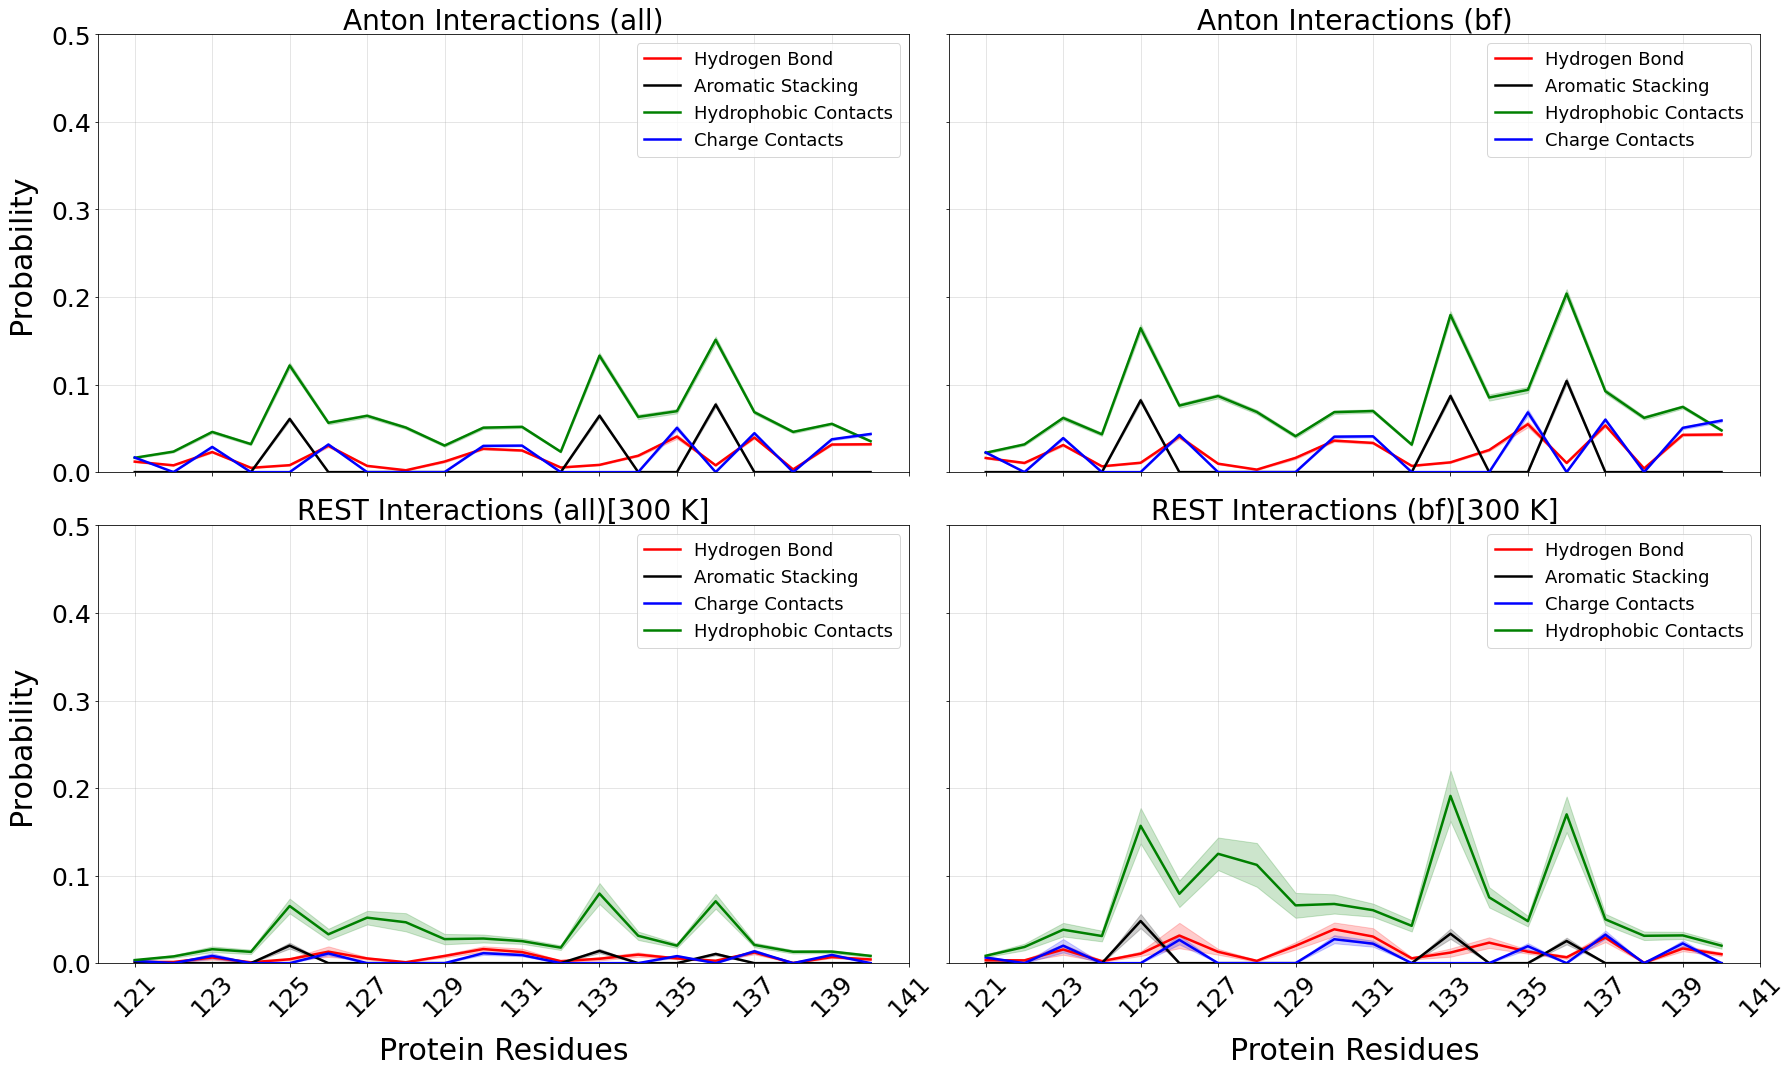

In [57]:
fig, ax = plt.subplots(2, 2, figsize=(25, 15), sharex=True, sharey=True)

i='rep'
val=0
k=['all','bf']

for j in range(4):
    
    p,q = np.unravel_index(j,(2, 2))
    
    if not p : 
    
        ax[p, q].plot(hbond_a[k[q]].T[0][:20:], hbond_a[k[q]].T[1][:20:], linewidth=2.5, label='Hydrogen Bond', color='red')
        ax[p, q].fill_between(hbond_a[k[q]].T[0][:20:], hbond_a[k[q]].T[1][:20:]-hbond_a[k[q]].T[2][:20:]
                         ,hbond_a[k[q]].T[1][:20:]+hbond_a[k[q]].T[2][:20:], alpha=0.2,color='r')

        ax[p, q].plot(aro_a[k[q]].T[0][:20:], aro_a[k[q]].T[1][:20:], linewidth=2.5, color='black', label='Aromatic Stacking')
        ax[p, q].fill_between(aro_a[k[q]].T[0][:20:], aro_a[k[q]].T[1][:20:]-aro_a[k[q]].T[2][:20:]
                         ,aro_a[k[q]].T[1][:20:]+aro_a[k[q]].T[2][:20:], alpha=0.2,color='black')

        ax[p, q].plot(hphob_a[k[q]].T[0][:20:], hphob_a[k[q]].T[1][:20:], linewidth=2.5, label='Hydrophobic Contacts', color='green')
        ax[p, q].fill_between(hphob_a[k[q]].T[0][:20:], hphob_a[k[q]].T[1][:20:]-hphob_a[k[q]].T[2][:20:]
                         ,hphob_a[k[q]].T[1][:20:]+hphob_a[k[q]].T[2][:20:], alpha=0.2,color='green')

        ax[p, q].plot(charge_a[k[q]].T[0][:20:], charge_a[k[q]].T[1][:20:], linewidth=2.5, label='Charge Contacts',c='blue')
        ax[p, q].fill_between(charge_a[k[q]].T[0][:20:], charge_a[k[q]].T[1][:20:]-charge_a[k[q]].T[2][:20:]
                                 ,charge_a[k[q]].T[1][:20:]+charge_a[k[q]].T[2][:20:], alpha=0.2,color='b')
        
        
        ax[p, q].set_ylim(0,0.5)
        ax[p, q].set_xticks(range(121,142,2))
        ax[p,q].tick_params(labelsize=25)
        ax[p,q].grid(alpha=0.4)
        plt.setp(ax[p,q].get_xticklabels(), rotation=45)

        if val == 0:
            ax[p,q].legend(loc=1,prop={'size': 18})
            
        a='Anton Interactions'+' ('+str(k[q])+')'
        ax[p,q].set_title(a,size=28)
        
    else:
        
        ax[p, q].plot(np.array(hbond[i][k[q]][val]).T[0], np.array(hbond[i][k[q]][val]).T[1], linewidth=2.5,
                             label='Hydrogen Bond', color='red')
        ax[p, q].fill_between(np.array(hbond[i][k[q]][val]).T[0], np.array(hbond[i][k[q]][val]).T[1]-np.array(hbond[i][k[q]][val]).T[2],
                                 np.array(hbond[i][k[q]][val]).T[1]+np.array(hbond[i][k[q]][val]).T[2], alpha=0.2,color='r')


        ax[p, q].plot(np.array(aro[i][k[q]][val]).T[0], np.array(aro[i][k[q]][val]).T[1], linewidth=2.5,
                             color='black', label='Aromatic Stacking')
        ax[p, q].fill_between(np.array(aro[i][k[q]][val]).T[0], np.array(aro[i][k[q]][val]).T[1]-np.array(aro[i][k[q]][val]).T[2],
                                 np.array(aro[i][k[q]][val]).T[1]+np.array(aro[i][k[q]][val]).T[2], alpha=0.2,color='black')

        ax[p, q].plot(np.array(charge[i][k[q]][val]).T[0], np.array(charge[i][k[q]][val]).T[1], linewidth=2.5,
                             label='Charge Contacts',c='blue')
        ax[p, q].fill_between(np.array(charge[i][k[q]][val]).T[0], np.array(charge[i][k[q]][val]).T[1]-np.array(charge[i][k[q]][val]).T[2],
                                 np.array(charge[i][k[q]][val]).T[1]+np.array(charge[i][k[q]][val]).T[2], alpha=0.2,color='b')

        ax[p, q].plot(np.array(hphob[i][k[q]][val]).T[0], np.array(hphob[i][k[q]][val]).T[1], linewidth=2.5,
                             label='Hydrophobic Contacts', color='green')
        ax[p, q].fill_between(np.array(hphob[i][k[q]][val]).T[0], np.array(hphob[i][k[q]][val]).T[1]-np.array(hphob[i][k[q]][val]).T[2],
                                 np.array(hphob[i][k[q]][val]).T[1]+np.array(hphob[i][k[q]][val]).T[2], alpha=0.2,color='g')
    
    
        
        ax[p, q].set_ylim(0,0.5)
        ax[p, q].set_xticks(range(121,142,2))
        ax[p,q].tick_params(labelsize=25)
        ax[p,q].grid(alpha=0.4)
        plt.setp(ax[p,q].get_xticklabels(), rotation=45)

        if val == 0:
            ax[p,q].legend(loc=1,prop={'size': 18})
            
        a='REST Interactions'+' ('+str(k[q])+')'+'[300 K]'
        ax[p,q].set_title(a,size=28)
    
    if not q : ax[p,q].set_ylabel("Probability", size=30, labelpad=15)
    if p == 2-1 : ax[p,q].set_xlabel('Protein Residues', size=30, labelpad=15)
    
plt.tight_layout()

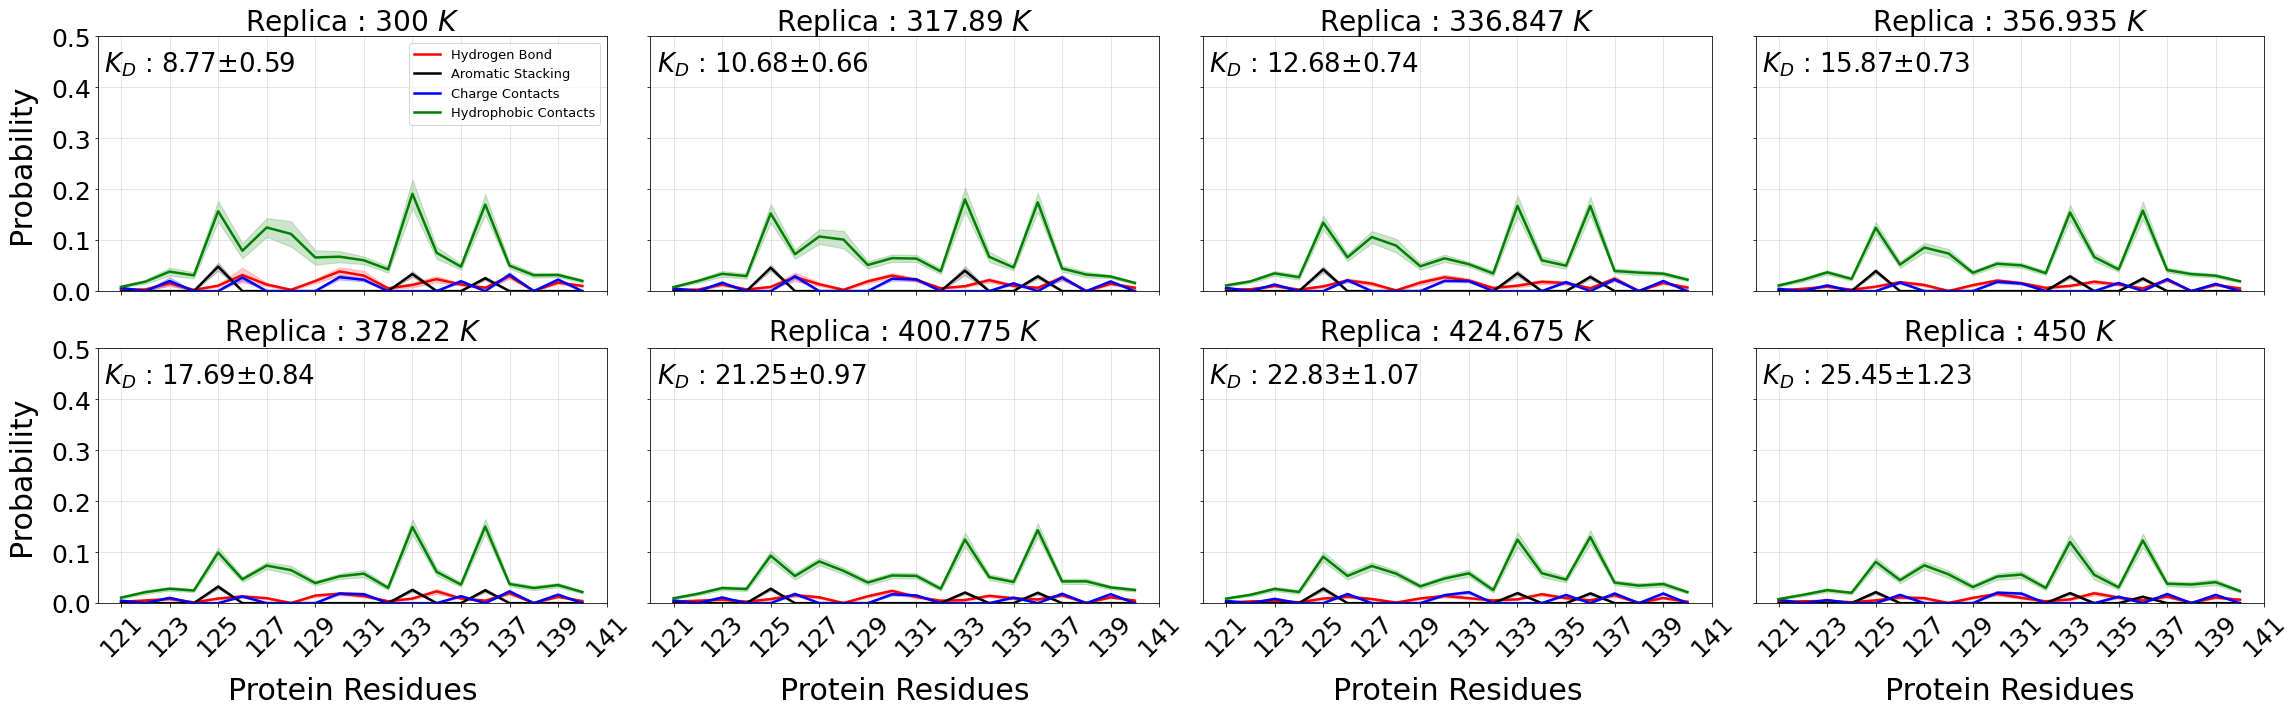

In [58]:
fig, ax = plt.subplots(2, 4, figsize=(32, 10), sharex=True, sharey=True)

i,j=['rep','bf']

for val in range(nrep):
    p, q = np.unravel_index(val,(2, 4))
    
    ax[p, q].plot(np.array(hbond[i][j][val]).T[0], np.array(hbond[i][j][val]).T[1], linewidth=2.5,
                         label='Hydrogen Bond', color='red')
    ax[p, q].fill_between(np.array(hbond[i][j][val]).T[0], np.array(hbond[i][j][val]).T[1]-np.array(hbond[i][j][val]).T[2],
                             np.array(hbond[i][j][val]).T[1]+np.array(hbond[i][j][val]).T[2], alpha=0.2,color='r')
    
    
    ax[p, q].plot(np.array(aro[i][j][val]).T[0], np.array(aro[i][j][val]).T[1], linewidth=2.5,
                         color='black', label='Aromatic Stacking')
    ax[p, q].fill_between(np.array(aro[i][j][val]).T[0], np.array(aro[i][j][val]).T[1]-np.array(aro[i][j][val]).T[2],
                             np.array(aro[i][j][val]).T[1]+np.array(aro[i][j][val]).T[2], alpha=0.2,color='black')
    
    ax[p, q].plot(np.array(charge[i][j][val]).T[0], np.array(charge[i][j][val]).T[1], linewidth=2.5,
                         label='Charge Contacts',c='blue')
    ax[p, q].fill_between(np.array(charge[i][j][val]).T[0], np.array(charge[i][j][val]).T[1]-np.array(charge[i][j][val]).T[2],
                             np.array(charge[i][j][val]).T[1]+np.array(charge[i][j][val]).T[2], alpha=0.2,color='b')
    
    ax[p, q].plot(np.array(hphob[i][j][val]).T[0], np.array(hphob[i][j][val]).T[1], linewidth=2.5,
                         label='Hydrophobic Contacts', color='green')
    ax[p, q].fill_between(np.array(hphob[i][j][val]).T[0], np.array(hphob[i][j][val]).T[1]-np.array(hphob[i][j][val]).T[2],
                             np.array(hphob[i][j][val]).T[1]+np.array(hphob[i][j][val]).T[2], alpha=0.2,color='g')
    
    ax[p, q].set_ylim(0,0.5)
    ax[p, q].set_xticks(range(121,142,2))
    ax[p,q].tick_params(labelsize=25)
    ax[p,q].grid(alpha=0.4)
    plt.setp(ax[p,q].get_xticklabels(), rotation=45)
    
    if val == 0:
        ax[p,q].legend(loc=1,prop={'size': 13})

    a='Replica : '+temperature[val]+' $K$'
    ax[p,q].set_title(a,size=28)
    
    text_=r'$K_{D}$'+' : '+str(round(np.array(bf_kd['rep'])[2][val],2))+r'$\pm$'+str(round(np.array(bf_kd['rep'])[3][val],2))
    ax[p,q].text(120.3, 0.43, text_, fontsize = 26)
    
    if not q : ax[p,q].set_ylabel("Probability", size=30, labelpad=15)
    if p == 2-1 : ax[p,q].set_xlabel('Protein Residues', size=30, labelpad=15)
        
plt.tight_layout()

plt.savefig(data_dir+'Ligand_interactions_rep.png',dpi=210)


In [59]:
data={}

data['temp']=np.loadtxt("./replica_temp.xvg",comments=['@','#'])
data['index']=np.loadtxt("./replica_index.xvg",comments=['@','#'])

In [60]:
data['temp'].T.shape

(9, 826481)

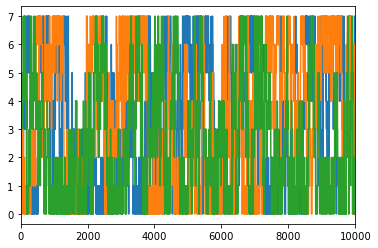

In [61]:
for i in range(1,4):
    plt.plot(data['temp'].T[i])
    
    plt.xlim(0,10000)

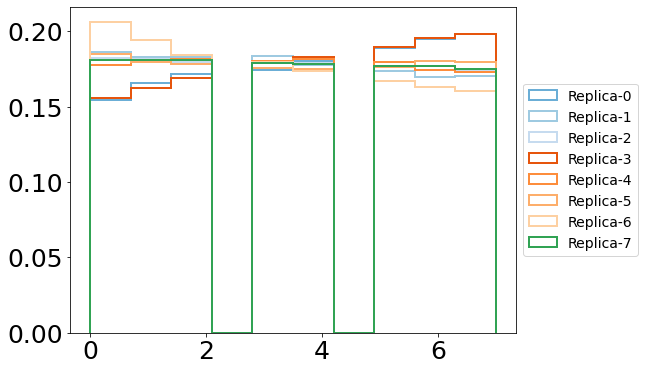

In [62]:
plt.figure(figsize=(8,6))
for i in range(1,9):
    plt.hist(data['temp'].T[i],histtype='step',density='true',linewidth=2,
             color=plt.cm.tab20c(i),label='Replica-'+str(i-1))
    
plt.tick_params(labelsize=25)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

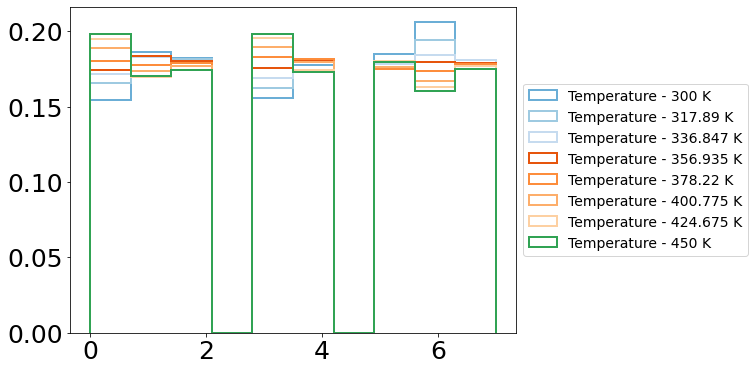

In [63]:
plt.figure(figsize=(8,6))
for i in range(1,9):
    plt.hist(data['index'].T[i],histtype='step',density='true',linewidth=2,
             color=plt.cm.tab20c(i),label='Temperature - '+temperature[i-1]+' K')
    
plt.tick_params(labelsize=25)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

In [64]:
prob=[]
b=0
for i in range(nrep):
    a=(np.where(data['temp'].T[1]==i)[0].shape[0])/(data['temp'].shape[0])
    prob.append(a)
    print(i,a)
    b=b+a
print(f'Probability check : {b}')


0 0.10801821215490737
1 0.11605469454228227
2 0.12015642222870217
3 0.12212863937585983
4 0.12629328441912155
5 0.13235754965933882
6 0.1363189232420346
7 0.1386722743777534
Probability check : 0.9999999999999999


Text(0.5, 1.0, 'From replica_temp.xvg to replica-0')

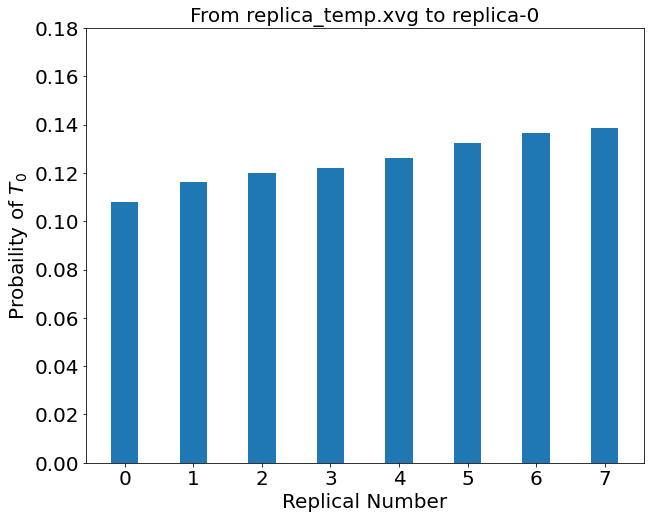

In [65]:
plt.figure(figsize=(10,8))
plt.bar(range(nrep),prob,width = 0.4)
plt.xticks(range(nrep),size=20)
plt.yticks(np.arange(0,0.2,0.02),size=20)
plt.ylabel(r'Probaility of $T_{0}$',size=20)
plt.xlabel('Replical Number',size=20)
plt.title('From replica_temp.xvg to replica-0',size=20)

In [66]:
T_mean=[]

for j in range(1,nrep+1):
    replica_T=[]
    for i in data['temp'].T[j]:
        replica_T.append(float(temperature[int(i)]))
    
    T_mean.append(np.mean(replica_T))
        

In [67]:
replica_T

[450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 400.775,
 400.775,
 400.775,
 400.775,
 400.775,
 400.775,
 400.775,
 400.775,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 400.775,
 400.775,
 400.775,
 400.775,
 424.675,
 424.675,
 400.775,
 400.775,
 400.775,
 400.775,
 400.775,
 400.775,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 424.675,
 400.775,
 400.775,
 400.775,
 400.775,
 400.775,
 400.775,
 400.775,
 400.775,
 424.675,
 424.675,
 400.775,
 400.775,
 400.775,
 400.775,
 424.675,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450

Text(0.5, 1.0, 'Mean replica temperature')

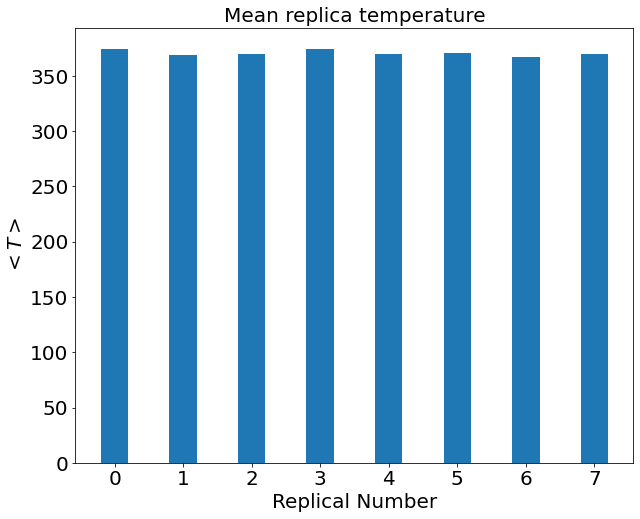

In [69]:
plt.figure(figsize=(10,8))
plt.bar(range(8),T_mean,width = 0.4)
plt.xticks(range(8),size=20)
plt.yticks(size=20)
plt.ylabel(r'$<T>$',size=20)
plt.xlabel('Replical Number',size=20)
plt.title('Mean replica temperature',size=20)

In [70]:
temp=0
for i in range(5):
    temp+=1
    
print(temp)

5


In [71]:
n=0
d=0
rt=0

r_trip=[]
for i in range(1,nrep+1):
    
    for j in data['temp'].T[i]:
        
        n+=1
        if j == 7:
            d=1
        if j == 0 and d == 1:
            d=0
            rt+=1
    if rt > 0:
        print(i,(n/rt*400*(0.002/1000)))
        r_trip.append(n/rt*400*(0.002/1000))

np.average(r_trip)    

1 0.6065915596330275
2 0.5986281575373471
3 0.5967371841155235
4 0.5974111587982833
5 0.598790798768339
6 0.6015327975739196
7 0.6035067935845612
8 0.6012820734341252


0.6005600654306409

Text(0.5, 0, 'Replical Number')

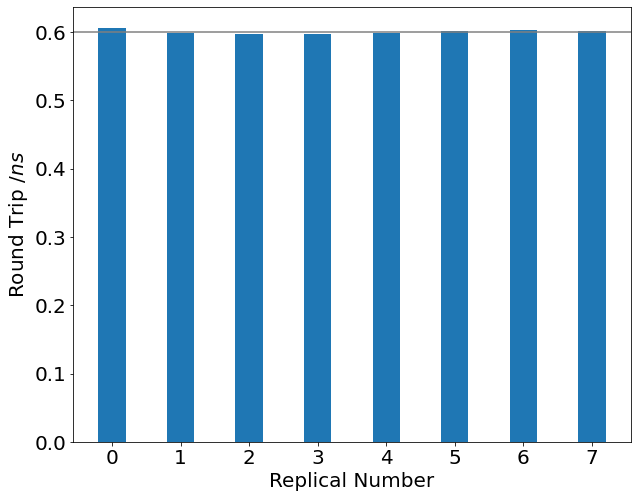

In [72]:
plt.figure(figsize=(10,8))
plt.bar(range(nrep),r_trip,width = 0.4)
plt.axhline(y=np.mean(r_trip),color='grey')
plt.xticks(range(nrep),size=20)
plt.yticks(size=20)
plt.ylabel(r'Round Trip $/ ns$',size=20)
plt.xlabel('Replical Number',size=20)
#plt.title('',size=20)